In [1]:
import warnings
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load df_data_explicit_avg_trial_trial_new.to_csv(r'C:\Users\qmoreau\Documents\Work\Beta_bursts\Bursts\Behavioral derivatives\behav_df_explicit_trial.csv')
explicit_behav = pd.read_csv('/home/qmoreau/Documents/Beta_bursts/Behavioral/Derivatives/behav_df_explicit_trial.csv')
implicit_behav = pd.read_csv('/home/qmoreau/Documents/Beta_bursts/Behavioral/Derivatives/behav_df_implicit_trial.csv')

In [3]:
# Moving average function from your code
def moving_average(data, window_size=10):
    """Apply a moving average to smooth data."""
    if window_size % 2 == 0:
        window_size += 1
    
    half_window = window_size // 2
    smoothed_data = []
    
    for i in range(len(data)):
        window_start = max(0, i - half_window)
        window_end = min(len(data), i + half_window + 1)
        window_values = data[window_start:window_end]
        smoothed_data.append(np.mean(window_values))
    
    return np.array(smoothed_data)

# Parameters
pc_key = "PC_7"
time_window_start = -0.75
time_window_end = -0.25
BASELINE_TRIALS = 55
WASHOUT_TRIALS = 55
window_size = 15

# Setup color palettes (from your first snippet)
implicit_palette = sns.color_palette("magma_r", 6)
explicit_palette = sns.color_palette("mako_r", 6)
implicit_colors = [implicit_palette[i] for i in [0, 2, 3, 5]]
explicit_colors = [explicit_palette[i] for i in [0, 2, 3, 5]]

# Format window values for file naming
formatted_start = f"{time_window_start:.3f}".rstrip('0').rstrip('.')
formatted_end = f"{time_window_end:.3f}".rstrip('0').rstrip('.')
if formatted_start == '-0': formatted_start = '0'
if formatted_end == '-0': formatted_end = '0'

# Load all quartile data files
def load_quartile_data(quartile_idx):
    filename = f'{pc_key}_Q{quartile_idx+1}_burst_rate_{formatted_start}_to_{formatted_end}.csv'
    try:
        return pd.read_csv(filename)
    except FileNotFoundError:
        print(f"Warning: File {filename} not found. Using empty DataFrame instead.")
        return pd.DataFrame()

# Implicit group data
implicit_error_data = implicit_behav
implicit_error_values = np.abs(implicit_error_data["reach_vis_err_corrected"].values)
implicit_trial_idx = implicit_error_data["trial_idx"].values

# Explicit group data
explicit_error_data = explicit_behav
explicit_error_values = np.abs(explicit_error_data["reach_vis_abs_err_corrected"].values) -2.5
explicit_trial_idx = explicit_error_data["trial_idx"].values


# Calculate smoothed error values
implicit_error_smooth = moving_average(implicit_error_values, window_size)
explicit_error_smooth = moving_average(explicit_error_values, window_size)

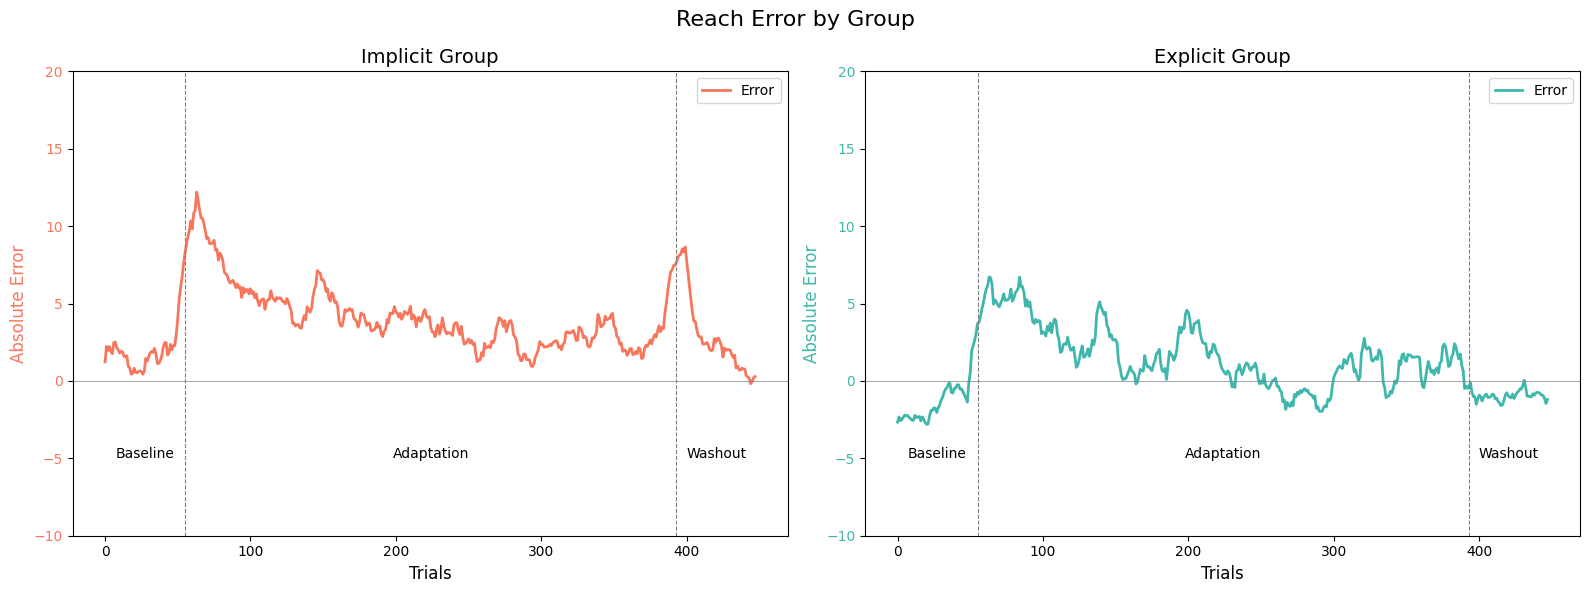

In [4]:
# Create a figure with two subplots (one for each group)
fig, (ax_implicit, ax_explicit) = plt.subplots(1, 2, figsize=(16, 6), sharex=True)
fig.subplots_adjust(wspace=0.3)

# Plot Implicit Group
ax_implicit.plot(implicit_trial_idx, implicit_error_smooth-2.5, '-', 
                color=implicit_palette[1], linewidth=2, label='Error')
ax_implicit.set_ylabel('Absolute Error', color=implicit_palette[1], fontsize=12)
ax_implicit.tick_params(axis='y', labelcolor=implicit_palette[1])
ax_implicit.set_ylim(-10, 20)

# Add phase transition lines
ax_implicit.axvline(BASELINE_TRIALS, linestyle='--', color='gray', linewidth=0.8)
ax_implicit.axvline(len(implicit_trial_idx) - WASHOUT_TRIALS, linestyle='--', color='gray', linewidth=0.8)
ax_implicit.axhline(0, linestyle='-', color='gray', linewidth=0.5)

# Add title
ax_implicit.set_title('Implicit Group', fontsize=14)
ax_implicit.legend(loc='upper right')

# Plot Explicit Group
ax_explicit.plot(explicit_trial_idx, explicit_error_smooth-2.5, '-', 
                color=explicit_palette[1], linewidth=2, label='Error')
ax_explicit.set_ylabel('Absolute Error', color=explicit_palette[1], fontsize=12)
ax_explicit.tick_params(axis='y', labelcolor=explicit_palette[1])
ax_explicit.set_ylim(-10, 20)

# Add phase transition lines
ax_explicit.axvline(BASELINE_TRIALS, linestyle='--', color='gray', linewidth=0.8)
ax_explicit.axvline(len(explicit_trial_idx) - WASHOUT_TRIALS, linestyle='--', color='gray', linewidth=0.8)
ax_explicit.axhline(0, linestyle='-', color='gray', linewidth=0.5)

# Add title
ax_explicit.set_title('Explicit Group', fontsize=14)
ax_explicit.legend(loc='upper right')

# Add X-axis labels
ax_implicit.set_xlabel('Trials', fontsize=12)
ax_explicit.set_xlabel('Trials', fontsize=12)

# Add phase labels
baseline_midpoint = BASELINE_TRIALS / 2
adapt_midpoint = BASELINE_TRIALS + (len(implicit_trial_idx) - WASHOUT_TRIALS - BASELINE_TRIALS) / 2
washout_midpoint = len(implicit_trial_idx) - WASHOUT_TRIALS + WASHOUT_TRIALS / 2

ax_implicit.text(baseline_midpoint, -5, "Baseline", fontsize=10, ha='center')
ax_implicit.text(adapt_midpoint, -5, "Adaptation", fontsize=10, ha='center')
ax_implicit.text(washout_midpoint, -5, "Washout", fontsize=10, ha='center')

ax_explicit.text(baseline_midpoint, -5, "Baseline", fontsize=10, ha='center')
ax_explicit.text(adapt_midpoint, -5, "Adaptation", fontsize=10, ha='center')
ax_explicit.text(washout_midpoint, -5, "Washout", fontsize=10, ha='center')

# Main title
plt.suptitle('Reach Error by Group', fontsize=16)
plt.tight_layout()
plt.show()

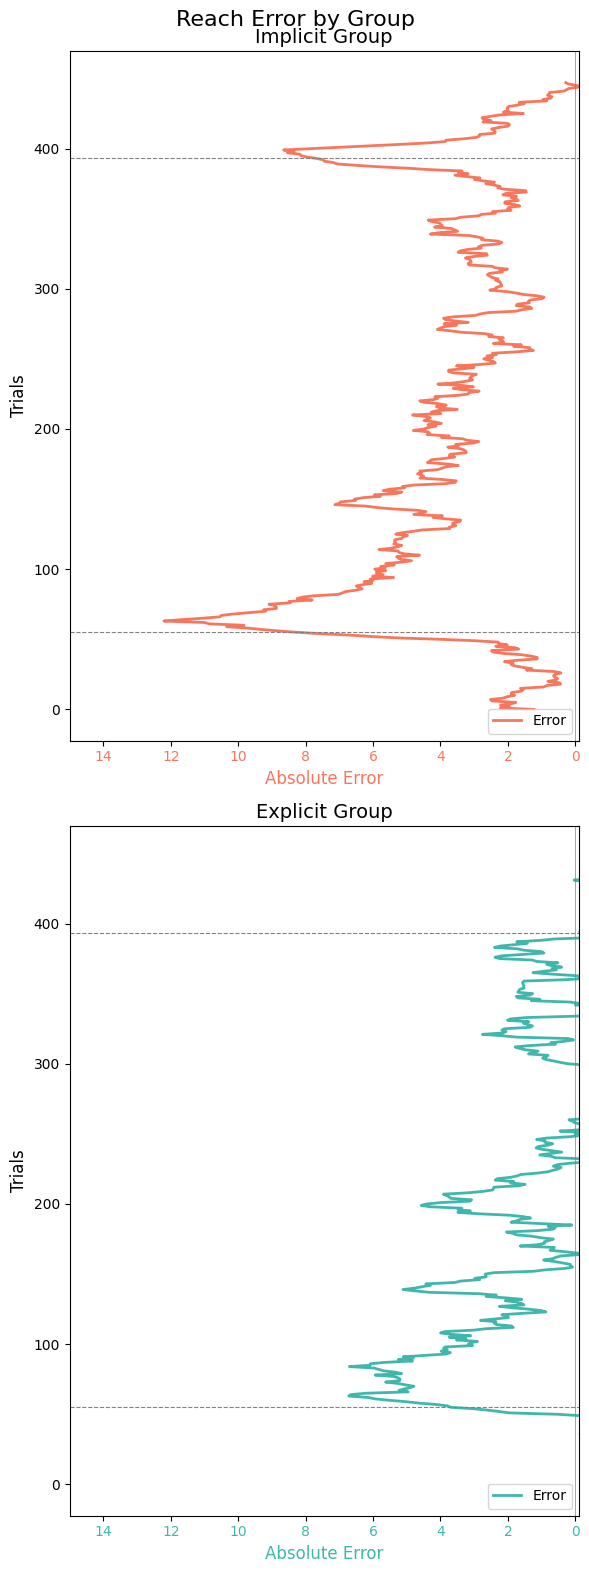

In [5]:
# Create a figure with two subplots (one for each group)
fig, (ax_implicit, ax_explicit) = plt.subplots(2, 1, figsize=(6, 16), sharey=True)
fig.subplots_adjust(hspace=0.3)

# Plot Implicit Group
ax_implicit.plot(implicit_error_smooth-2.5, implicit_trial_idx, '-', 
                color=implicit_palette[1], linewidth=2, label='Error')
ax_implicit.set_xlabel('Absolute Error', color=implicit_palette[1], fontsize=12)
ax_implicit.tick_params(axis='x', labelcolor=implicit_palette[1])
ax_implicit.set_xlim(15, -0.1)

# Add phase transition lines
ax_implicit.axhline(BASELINE_TRIALS, linestyle='--', color='gray', linewidth=0.8)
ax_implicit.axhline(len(implicit_trial_idx) - WASHOUT_TRIALS, linestyle='--', color='gray', linewidth=0.8)
ax_implicit.axvline(0, linestyle='-', color='gray', linewidth=0.5)

# Add title
ax_implicit.set_title('Implicit Group', fontsize=14)
ax_implicit.legend(loc='lower right')

# Plot Explicit Group
ax_explicit.plot(explicit_error_smooth-2.5, explicit_trial_idx, '-', 
                color=explicit_palette[1], linewidth=2, label='Error')
ax_explicit.set_xlabel('Absolute Error', color=explicit_palette[1], fontsize=12)
ax_explicit.tick_params(axis='x', labelcolor=explicit_palette[1])
ax_explicit.set_xlim(15, -0.1)

# Add phase transition lines
ax_explicit.axhline(BASELINE_TRIALS, linestyle='--', color='gray', linewidth=0.8)
ax_explicit.axhline(len(explicit_trial_idx) - WASHOUT_TRIALS, linestyle='--', color='gray', linewidth=0.8)
ax_explicit.axvline(0, linestyle='-', color='gray', linewidth=0.5)

# Add title
ax_explicit.set_title('Explicit Group', fontsize=14)
ax_explicit.legend(loc='lower right')

# Add Y-axis labels (was x-axis before rotation)
ax_implicit.set_ylabel('Trials', fontsize=12)
ax_explicit.set_ylabel('Trials', fontsize=12)

# Add phase labels (rotated to be on the y-axis now)
baseline_midpoint = BASELINE_TRIALS / 2
adapt_midpoint = BASELINE_TRIALS + (len(implicit_trial_idx) - WASHOUT_TRIALS - BASELINE_TRIALS) / 2
washout_midpoint = len(implicit_trial_idx) - WASHOUT_TRIALS + WASHOUT_TRIALS / 2

# Main title
plt.suptitle('Reach Error by Group', fontsize=16)
plt.tight_layout()
plt.show()

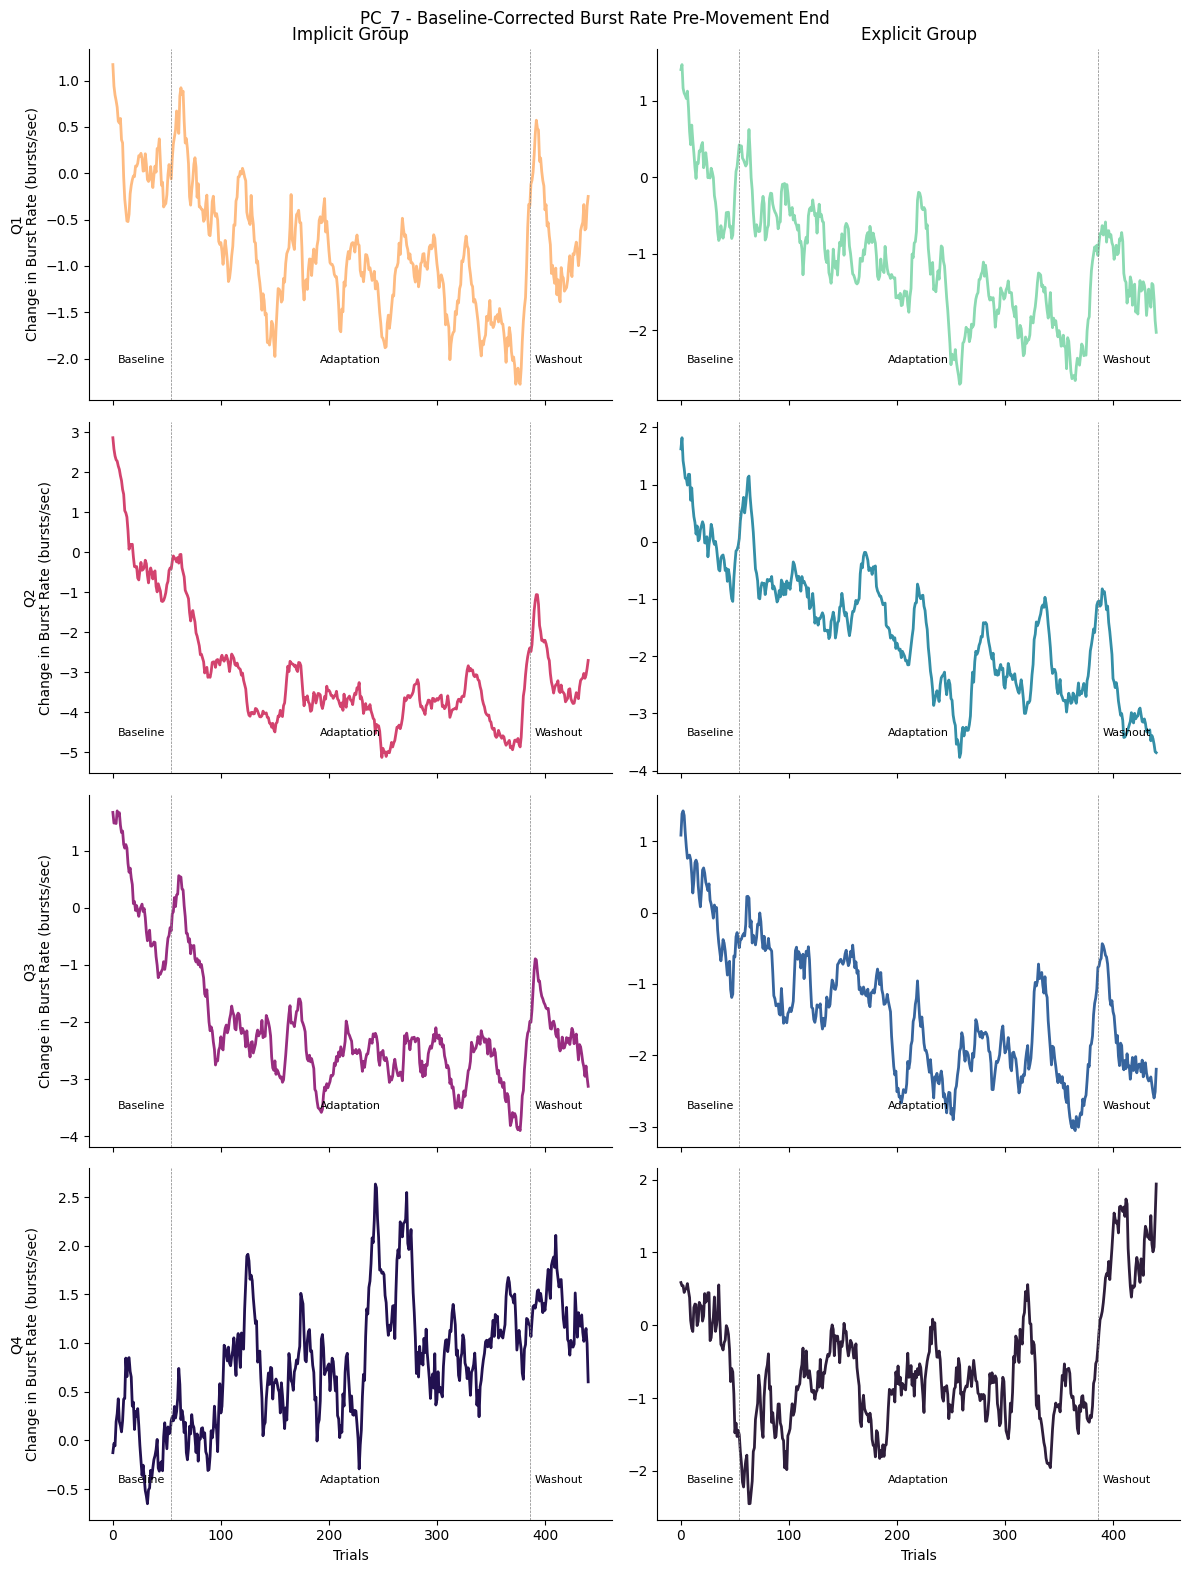

In [9]:
warnings.filterwarnings("ignore")

# Moving average function
def moving_average(data, window_size=10):
    """Apply a moving average to smooth data."""
    if window_size % 2 == 0:
        window_size += 1
    
    half_window = window_size // 2
    smoothed_data = []
    
    for i in range(len(data)):
        window_start = max(0, i - half_window)
        window_end = min(len(data), i + half_window + 1)
        window_values = data[window_start:window_end]
        smoothed_data.append(np.mean(window_values))
    
    return np.array(smoothed_data)

# Parameters
pc_key = "PC_7"
time_window_start = -0.75
time_window_end = -0.25
BASELINE_TRIALS = 55
WASHOUT_TRIALS = 55
window_size = 15

# Setup time windows
start, end, step = -1, 1.3, 0.1
start_2, end_2 = -0.8, 1.5
window_start = np.arange(start, end, step)
window_end = np.arange(start_2, end_2, step)

# Setup color palettes
implicit_palette = sns.color_palette("magma_r", 6)
explicit_palette = sns.color_palette("mako_r", 6)
implicit_colors = [implicit_palette[i] for i in [0, 2, 3, 5]]
explicit_colors = [explicit_palette[i] for i in [0, 2, 3, 5]]

# Format window values for file naming
formatted_start = f"{time_window_start:.3f}".rstrip('0').rstrip('.')
formatted_end = f"{time_window_end:.3f}".rstrip('0').rstrip('.')
if formatted_start == '-0': formatted_start = '0'
if formatted_end == '-0': formatted_end = '0'

def process_quartile(quartile_idx):
    """Process data for a single quartile."""
    # Find windows that overlap with target time period
    relevant_windows = []
    for i in range(len(window_start)):
        current_start = window_start[i]
        current_end = window_end[i]
        
        if current_start <= time_window_end and current_end >= time_window_start:
            # Format for file naming
            current_start_fmt = f"{current_start:.3f}".rstrip('0').rstrip('.')
            current_end_fmt = f"{current_end:.3f}".rstrip('0').rstrip('.')
            if current_start_fmt == '-0': current_start_fmt = '0'
            if current_end_fmt == '-0': current_end_fmt = '0'
            
            relevant_windows.append({
                'start': current_start,
                'end': current_end,
                'overlap': min(current_end, time_window_end) - max(current_start, time_window_start),
                'file_path':  f'/home/qmoreau/Documents/Beta_bursts/Burst files/Motor_PCs_sliding_window/{pc_key}_Motor_SW/behav_df_Q{quartile_idx}_window_{current_start_fmt}_{current_end_fmt}.csv'
            })

    # Calculate total overlap for weighting
    total_overlap = sum(window['overlap'] for window in relevant_windows)
    
    if total_overlap == 0:
        print(f"No relevant windows found for quartile {quartile_idx+1}")
        return pd.DataFrame()
    
    # Data storage
    weighted_bursts = {}
    trial_data = {}
    
    # Process each window
    for window in relevant_windows:
        weight = window['overlap'] / total_overlap
        
        data = pd.read_csv(window['file_path'])
        
        # Find block column name
        block_column = next((col for col in data.columns if col.lower() in ['block', 'block_num']), None)
        if block_column is None:
            print(f"Warning: No block column found in {window['file_path']}")
            continue
        
        # Process each row
        for _, row in data.iterrows():
            if not all(col in row for col in ['subject', 'group', 'trial']):
                continue
            
            trial_key = (row['subject'], row['group'], row[block_column], row['trial'])
            
            # Store trial data
            if trial_key not in trial_data:
                trial_data[trial_key] = {
                    'subject': row['subject'],
                    'group': row['group'],
                    'block_num': row[block_column],
                    'trial': row['trial'],
                    'reach_vis_abs_err': row.get('reach_vis_abs_err'),
                    'log_rt': np.log10(row['reach_rt']) if 'reach_rt' in row else None
                }
            
            # Add weighted burst count
            if trial_key not in weighted_bursts:
                weighted_bursts[trial_key] = 0
            
            burst_count = row.get('burst_count', 0)
            if not pd.isna(burst_count):
                weighted_bursts[trial_key] += burst_count * weight
    
    # Create final DataFrame
    results = []
    for trial_key, data_dict in trial_data.items():
        burst_count = weighted_bursts.get(trial_key, 0)
        time_duration = time_window_end - time_window_start
        
        results.append({
            'subject': data_dict['subject'],
            'group': data_dict['group'],
            'block_num': data_dict['block_num'],
            'trial': data_dict['trial'],
            'burst_count': burst_count,
            'burst_rate': burst_count / time_duration,
            'reach_vis_abs_err': data_dict['reach_vis_abs_err'],
            'log_rt': data_dict['log_rt'],
            'quartile': quartile_idx + 1
        })
    
    burst_data = pd.DataFrame(results)
    
    if burst_data.empty:
        return burst_data
    
    # Calculate trial indices
    max_trials_per_block = burst_data["trial"].max()
    burst_data["block_idx"] = burst_data["block_num"] + 1
    burst_data["trial_idx"] = (burst_data["block_idx"] - 1) * max_trials_per_block + burst_data["trial"]
    
    # Save to CSV
    output_file = f'{pc_key}_Q{quartile_idx+1}_burst_rate_{formatted_start}_to_{formatted_end}.csv'
    burst_data.to_csv(output_file, index=False)
    
    return burst_data

def plot_quartile(quartile_idx, burst_data, axes):
    """Plot data for a single quartile."""
    if burst_data.empty:
        print(f"No data for quartile {quartile_idx+1}, skipping plot.")
        return
    
    # Separate by group
    implicit_data = burst_data[burst_data['group'] == 'Implicit']
    explicit_data = burst_data[burst_data['group'] == 'Explicit']
    
    if implicit_data.empty and explicit_data.empty:
        print(f"No group data for quartile {quartile_idx+1}, skipping plot.")
        return
    
    # Process and plot each group
    for group_idx, (group_data, group_name, colors) in enumerate([
        (implicit_data, 'Implicit', implicit_colors),
        (explicit_data, 'Explicit', explicit_colors)
    ]):
        if group_data.empty:
            continue
        
        # Calculate stats
        summary = group_data.groupby('trial_idx')['burst_rate'].agg(['mean', 'sem']).reset_index()
        summary = summary.sort_values('trial_idx')
        
        # Baseline correction - subtract mean of first BASELINE_TRIALS
        baseline_mean = summary.iloc[:BASELINE_TRIALS]['mean'].mean()
        summary['mean_corrected'] = summary['mean'] - baseline_mean
        
        # Apply smoothing to the baseline-corrected values
        summary['smoothed_mean'] = moving_average(summary['mean_corrected'].values, window_size)
        
        # Find phase transitions
        baseline_end_idx = min(BASELINE_TRIALS - 1, len(summary) - 1)
        washout_start_idx = max(0, len(summary) - WASHOUT_TRIALS)
        
        baseline_end = summary.iloc[baseline_end_idx]['trial_idx']
        washout_start = summary.iloc[washout_start_idx]['trial_idx']
        
        # Plot data
        ax = axes[quartile_idx, group_idx]
        
        # Smoothed line only
        ax.plot(summary['trial_idx'], summary['smoothed_mean'], 
                linestyle='-', color=colors[quartile_idx], linewidth=2,
                label='Moving Average')
        
        # Phase transition lines
        ax.axvline(baseline_end, linestyle='--', color='gray', linewidth=0.5)
        ax.axvline(washout_start, linestyle='--', color='gray', linewidth=0.5)
        
        # Phase labels
        y_min, y_max = ax.get_ylim()
        y_pos = y_min + 0.1 * (y_max - y_min)
        
        baseline_midpoint = summary.iloc[0]['trial_idx'] + (baseline_end - summary.iloc[0]['trial_idx']) / 2
        adapt_midpoint = baseline_end + (washout_start - baseline_end) / 2
        washout_midpoint = washout_start + (summary['trial_idx'].max() - washout_start) / 2
        
        ax.text(baseline_midpoint, y_pos, "Baseline", fontsize=8, ha='center', va='bottom')
        ax.text(adapt_midpoint, y_pos, "Adaptation", fontsize=8, ha='center', va='bottom')
        ax.text(washout_midpoint, y_pos, "Washout", fontsize=8, ha='center', va='bottom')
        
        # Style
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        


# Create figure
fig, axes = plt.subplots(4, 2, figsize=(12, 16), sharex=True)
fig.subplots_adjust(hspace=0.3, wspace=0.2)

# Process all quartiles
for quartile_idx in range(4):
    burst_data = process_quartile(quartile_idx)
    plot_quartile(quartile_idx, burst_data, axes)
    
    # Add quartile labels
    axes[quartile_idx, 0].set_ylabel(f"Q{quartile_idx+1}\nChange in Burst Rate (bursts/sec)")

# Add titles and labels
axes[0, 0].set_title("Implicit Group")
axes[0, 1].set_title("Explicit Group")
axes[3, 0].set_xlabel("Trials")
axes[3, 1].set_xlabel("Trials")

plt.suptitle(f"{pc_key} - Baseline-Corrected Burst Rate Pre-Movement End")
plt.tight_layout()


plt.show()

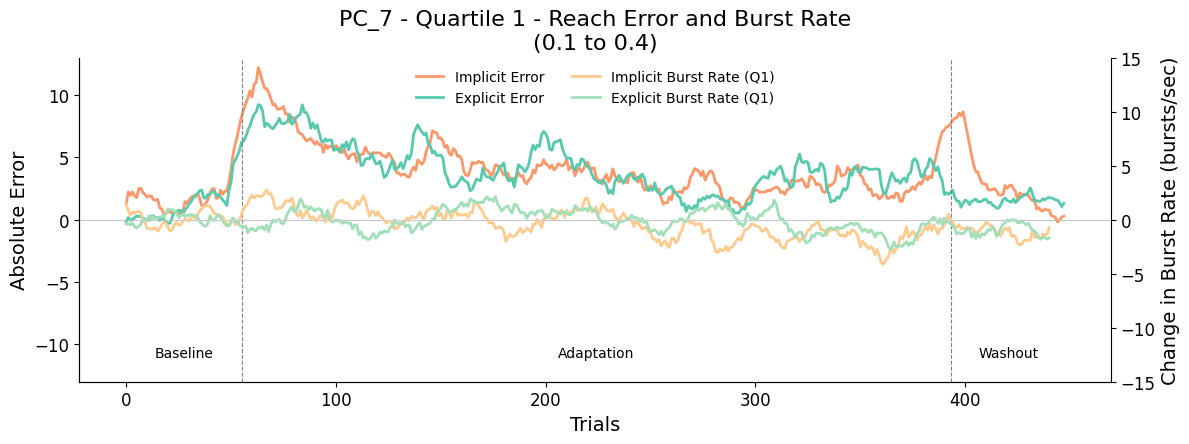

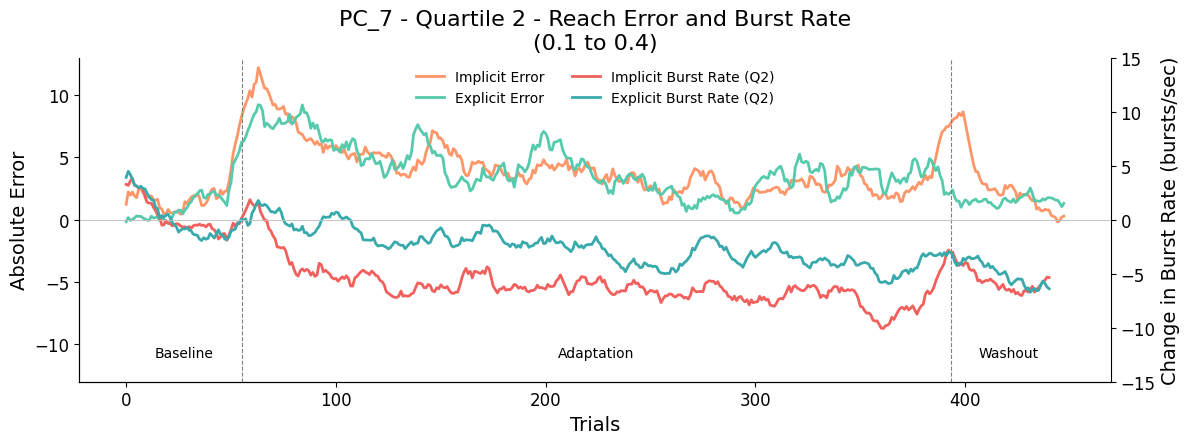

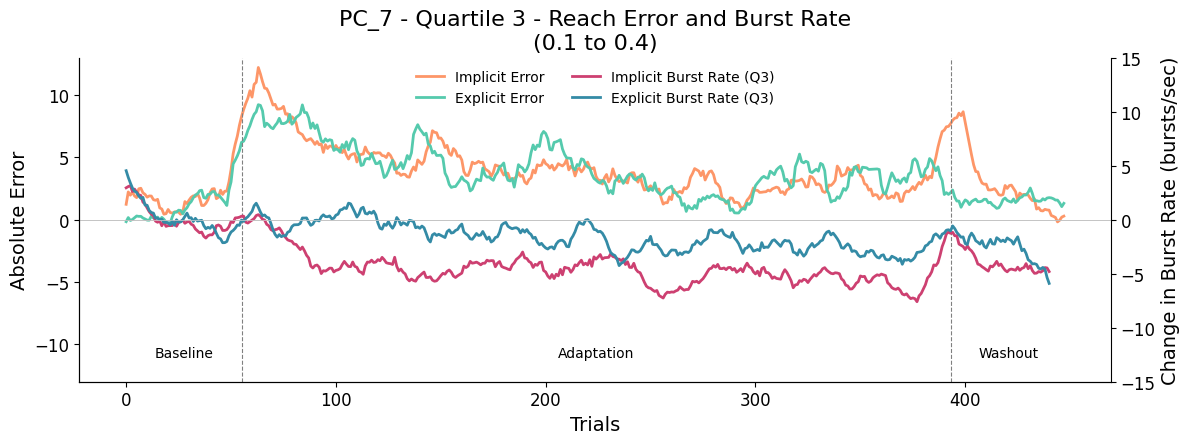

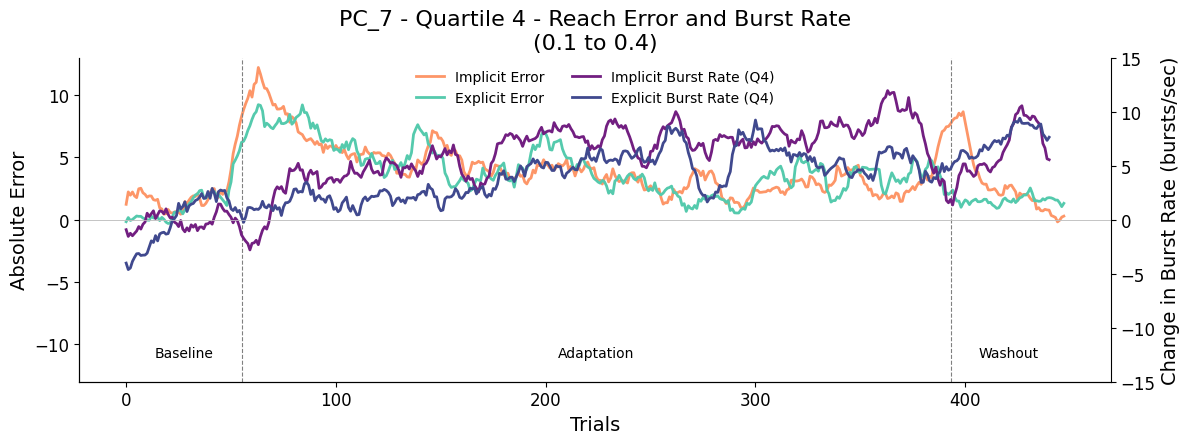

In [11]:


warnings.filterwarnings("ignore")

# Moving average function
def moving_average(data, window_size=10):
    """Apply a moving average to smooth data."""
    if window_size % 2 == 0:
        window_size += 1
    
    half_window = window_size // 2
    smoothed_data = []
    
    for i in range(len(data)):
        window_start = max(0, i - half_window)
        window_end = min(len(data), i + half_window + 1)
        window_values = data[window_start:window_end]
        smoothed_data.append(np.mean(window_values))
    
    return np.array(smoothed_data)

# Format axes function
def format_axes(ax):
    """Format the axes by removing top and right spines."""
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

# Parameters
pc_key = "PC_7"
time_window_start = 0.1
time_window_end = 0.4
BASELINE_TRIALS = 55
WASHOUT_TRIALS = 55
window_size = 15

# Setup time windows
start, end, step = -1, 1.3, 0.1
start_2, end_2 = -0.8, 1.5
window_start = np.arange(start, end, step)
window_end = np.arange(start_2, end_2, step)

# Setup color palettes
implicit_palette = sns.color_palette("magma_r", 8)
explicit_palette = sns.color_palette("mako_r", 8)
implicit_colors = [implicit_palette[i] for i in [0, 2, 3, 5]]
explicit_colors = [explicit_palette[i] for i in [0, 2, 3, 5]]

# Format window values for file naming
formatted_start = f"{time_window_start:.3f}".rstrip('0').rstrip('.')
formatted_end = f"{time_window_end:.3f}".rstrip('0').rstrip('.')
if formatted_start == '-0': formatted_start = '0'
if formatted_end == '-0': formatted_end = '0'

def process_quartile(quartile_idx):
    """Process data for a single quartile."""
    # Find windows that overlap with target time period
    relevant_windows = []
    for i in range(len(window_start)):
        current_start = window_start[i]
        current_end = window_end[i]
        
        if current_start <= time_window_end and current_end >= time_window_start:
            # Format for file naming
            current_start_fmt = f"{current_start:.3f}".rstrip('0').rstrip('.')
            current_end_fmt = f"{current_end:.3f}".rstrip('0').rstrip('.')
            if current_start_fmt == '-0': current_start_fmt = '0'
            if current_end_fmt == '-0': current_end_fmt = '0'
            
            relevant_windows.append({
                'start': current_start,
                'end': current_end,
                'overlap': min(current_end, time_window_end) - max(current_start, time_window_start),
                'file_path':  f'/home/qmoreau/Documents/Beta_bursts/Burst files/Motor_PCs_sliding_window/{pc_key}_Motor_SW/behav_df_Q{quartile_idx}_window_{current_start_fmt}_{current_end_fmt}.csv'
            })

    # Calculate total overlap for weighting
    total_overlap = sum(window['overlap'] for window in relevant_windows)
    
    if total_overlap == 0:
        return pd.DataFrame()
    
    # Data storage
    weighted_bursts = {}
    trial_data = {}
    
    # Process each window
    for window in relevant_windows:
        try:
            weight = window['overlap'] / total_overlap
            
            data = pd.read_csv(window['file_path'])
            
            # Find block column name
            block_column = next((col for col in data.columns if col.lower() in ['block', 'block_num']), None)
            if block_column is None:
                continue
            
            # Process each row
            for _, row in data.iterrows():
                if not all(col in row.index for col in ['subject', 'group', 'trial']):
                    continue
                
                trial_key = (row['subject'], row['group'], row[block_column], row['trial'])
                
                # Store trial data
                if trial_key not in trial_data:
                    trial_data[trial_key] = {
                        'subject': row['subject'],
                        'group': row['group'],
                        'block_num': row[block_column],
                        'trial': row['trial'],
                        'reach_vis_abs_err': row.get('reach_vis_abs_err'),
                        'log_rt': np.log10(row['reach_rt']) if 'reach_rt' in row else None
                    }
                
                # Add weighted burst count
                if trial_key not in weighted_bursts:
                    weighted_bursts[trial_key] = 0
                
                burst_count = row.get('burst_count', 0)
                if not pd.isna(burst_count):
                    weighted_bursts[trial_key] += burst_count * weight
        except FileNotFoundError:
            pass
        except Exception:
            pass
    
    # Create final DataFrame
    results = []
    for trial_key, data_dict in trial_data.items():
        burst_count = weighted_bursts.get(trial_key, 0)
        time_duration = time_window_end - time_window_start
        
        results.append({
            'subject': data_dict['subject'],
            'group': data_dict['group'],
            'block_num': data_dict['block_num'],
            'trial': data_dict['trial'],
            'burst_count': burst_count,
            'burst_rate': burst_count / time_duration,
            'reach_vis_abs_err': data_dict['reach_vis_abs_err'],
            'log_rt': data_dict['log_rt'],
            'quartile': quartile_idx + 1
        })
    
    burst_data = pd.DataFrame(results)
    
    if burst_data.empty:
        return burst_data
    
    # Calculate trial indices
    max_trials_per_block = burst_data["trial"].max()
    burst_data["block_idx"] = burst_data["block_num"] + 1
    burst_data["trial_idx"] = (burst_data["block_idx"] - 1) * max_trials_per_block + burst_data["trial"]
    
    # Save to CSV
    output_file = f'{pc_key}_Q{quartile_idx+1}_burst_rate_{formatted_start}_to_{formatted_end}.csv'
    burst_data.to_csv(output_file, index=False)
    
    return burst_data


# Implicit group error data
implicit_error_values = np.abs(implicit_behav["reach_vis_err_corrected"].values)
implicit_trial_idx = implicit_behav["trial_idx"].values

# Explicit group error data
explicit_error_values = np.abs(explicit_behav["reach_vis_abs_err_corrected"].values)
explicit_trial_idx = explicit_behav["trial_idx"].values

# Calculate smoothed error values
implicit_error_smooth = moving_average(implicit_error_values, window_size)
explicit_error_smooth = moving_average(explicit_error_values, window_size)

def load_quartile_data(quartile_idx):
    # Use the enhanced process_quartile function to directly get the processed data
    burst_data = process_quartile(quartile_idx)
    
    # Check if we got data back
    if burst_data.empty:
        return pd.DataFrame()
    
    return burst_data

# Generate plots for each quartile
for quartile_idx in range(4):
    # Load data for this quartile
    quartile_data = load_quartile_data(quartile_idx)
    
    if quartile_data.empty:
        continue
    
    # Separate by group
    implicit_qt_data = quartile_data[quartile_data['group'] == 'Implicit']
    explicit_qt_data = quartile_data[quartile_data['group'] == 'Explicit']
    
    # Create a figure with a single panel for this quartile
    fig, ax = plt.subplots(1, 1, figsize=(12, 5))
    
    # Process and plot implicit group error
    if not implicit_qt_data.empty:
        # Calculate burst rate stats
        implicit_summary = implicit_qt_data.groupby('trial_idx')['burst_rate'].agg(['mean']).reset_index()
        implicit_summary = implicit_summary.sort_values('trial_idx')
        
        # Baseline correction - calculate baseline mean
        implicit_baseline_mean = implicit_summary.iloc[:BASELINE_TRIALS]['mean'].mean() if len(implicit_summary) >= BASELINE_TRIALS else implicit_summary['mean'].mean()
        
        # Apply baseline correction to the entire dataset
        implicit_summary['mean_corrected'] = implicit_summary['mean'] - implicit_baseline_mean
        
        # Apply smoothing to the baseline-corrected data
        implicit_summary['smoothed_mean'] = moving_average(implicit_summary['mean_corrected'].values, window_size)
        
        # Plot error on primary y-axis (solid line)
        ax.plot(implicit_trial_idx, implicit_error_smooth-2.5, '-', 
                color=implicit_palette[1], linewidth=2, label='Implicit Error')
    
    # Process and plot explicit group error 
    if not explicit_qt_data.empty:
        # Plot error on primary y-axis (solid line with different color)
        ax.plot(explicit_trial_idx, explicit_error_smooth-2.5, '-', 
                color=explicit_palette[1], linewidth=2, label='Explicit Error')
    
    # Set y-axis label for error
    ax.set_ylabel('Absolute Error', fontsize=14)
    ax.set_ylim(-13, 13)
    
    # Create twin axis for burst rate
    ax_twin = ax.twinx()
    
    # Plot implicit burst rate
    if not implicit_qt_data.empty:
        ax_twin.plot(implicit_summary['trial_idx'], implicit_summary['smoothed_mean'], '-',
                    color=implicit_colors[quartile_idx], linewidth=2, 
                    label=f'Implicit Burst Rate (Q{quartile_idx+1})')
    
    # Process and plot explicit burst rate
    if not explicit_qt_data.empty:
        # Calculate burst rate stats
        explicit_summary = explicit_qt_data.groupby('trial_idx')['burst_rate'].agg(['mean']).reset_index()
        explicit_summary = explicit_summary.sort_values('trial_idx')
        
        # Baseline correction - calculate baseline mean
        explicit_baseline_mean = explicit_summary.iloc[:BASELINE_TRIALS]['mean'].mean() if len(explicit_summary) >= BASELINE_TRIALS else explicit_summary['mean'].mean()
        
        # Apply baseline correction to the entire dataset
        explicit_summary['mean_corrected'] = explicit_summary['mean'] - explicit_baseline_mean
        
        # Apply smoothing to the baseline-corrected data
        explicit_summary['smoothed_mean'] = moving_average(explicit_summary['mean_corrected'].values, window_size)
        
        # Plot burst rate using the smoothed and baseline-corrected data (solid line)
        ax_twin.plot(explicit_summary['trial_idx'], explicit_summary['smoothed_mean'], '-',
                    color=explicit_colors[quartile_idx], linewidth=2, 
                    label=f'Explicit Burst Rate (Q{quartile_idx+1})')
    
    # Set y-axis label for burst rate
    ax_twin.set_ylabel('Change in Burst Rate (bursts/sec)', fontsize=14)
    
    # Set fixed y-axis limits for burst rate
    ax_twin.set_ylim(-18, 18)
    
    # Format axes properly
    format_axes(ax)
    # Only remove top spine from twin axis
    ax_twin.spines['top'].set_visible(False)
    
    # Increase tick label size
    ax.tick_params(axis='both', labelsize=12)
    ax_twin.tick_params(axis='both', labelsize=12)
    
    # Add phase transition lines
    ax.axvline(BASELINE_TRIALS, linestyle='--', color='gray', linewidth=0.8)
    ax.axvline(len(implicit_trial_idx) - WASHOUT_TRIALS, linestyle='--', color='gray', linewidth=0.8)
    ax.axhline(0, linestyle='-', color='gray', linewidth=0.5)
    ax_twin.axhline(0, linestyle='-', color='lightgray', linewidth=0.5)
    
    # Create combined legend and place it in the center
    lines1, labels1 = ax.get_legend_handles_labels()
    lines2, labels2 = ax_twin.get_legend_handles_labels()
    # Position the legend in the center of the plot
    ax.legend(lines1 + lines2, labels1 + labels2, 
              loc='upper center', fontsize=10, frameon=False, ncol=2)
    
    # Add X-axis label
    ax.set_xlabel('Trials', fontsize=14)
    
    # Add phase labels
    baseline_midpoint = BASELINE_TRIALS / 2
    adapt_midpoint = BASELINE_TRIALS + (len(implicit_trial_idx) - WASHOUT_TRIALS - BASELINE_TRIALS) / 2
    washout_midpoint = len(implicit_trial_idx) - WASHOUT_TRIALS + WASHOUT_TRIALS / 2
    
    ax.text(baseline_midpoint, -11, "Baseline", fontsize=10, ha='center')
    ax.text(adapt_midpoint, -11, "Adaptation", fontsize=10, ha='center')
    ax.text(washout_midpoint, -11, "Washout", fontsize=10, ha='center')
    
    # Main title
    window_label = f"({time_window_start} to {time_window_end})"
    plt.title(f'{pc_key} - Quartile {quartile_idx+1} - Reach Error and Burst Rate\n{window_label}', fontsize=16)
    
    # Set consistent axes limits like in the reference code
    ax.set_ylim(-13, 13)
    ax_twin.set_ylim(-15, 15)
    
    plt.tight_layout(rect=[0, 0.05, 1, 0.96])
    plt.show()

NameError: name 'collect_time_series_data' is not defined

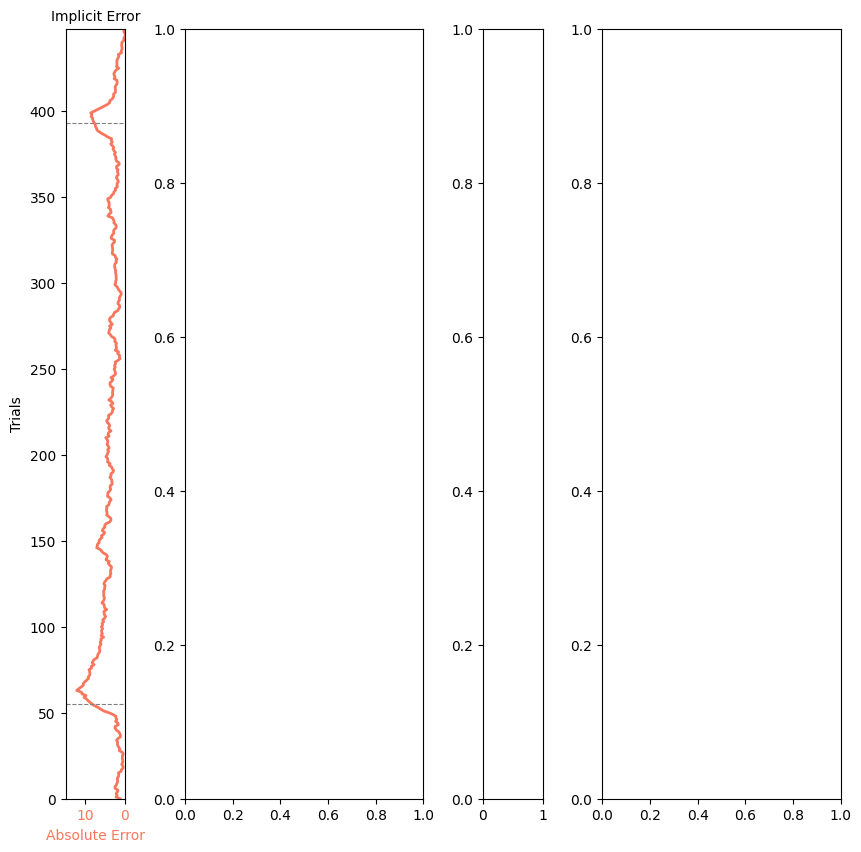

In [13]:
def plot_combined_figure(quartile_idx=0, implicit_error_smooth=None, explicit_error_smooth=None, trial_smooth_window=5, vmin=-12, vmax=12):
    """Create a combined figure with both error plots and heatmaps.
    
    Parameters:
    quartile_idx (int): Index of the quartile to plot
    implicit_error_smooth (array): Smoothed error data for implicit group
    explicit_error_smooth (array): Smoothed error data for explicit group
    trial_smooth_window (int): Window size for trial-wise smoothing of heatmaps
    """
    
    # Check if error data was provided, exit if not
    if implicit_error_smooth is None or explicit_error_smooth is None:
        print("Error: Missing error data. Both implicit_error_smooth and explicit_error_smooth must be provided.")
        return None
    
    # Create figure with 4 subplots in a row, adding space for colorbar
    # Adjust width ratios to make actual plotting area equal
    fig, axes = plt.subplots(1, 4, figsize=(10, 10), gridspec_kw={'width_ratios': [0.5, 2, 0.5, 2]})
    fig.subplots_adjust(wspace=0.4)
    
    # Define skip trials consistently across all plots
    skip_trials = 0
    
    # Define implicit and explicit trial indexes for error plots
    # Apply skip_trials to ensure consistency
    implicit_trial_idx = np.arange(skip_trials, len(implicit_error_smooth))
    explicit_trial_idx = np.arange(skip_trials, len(explicit_error_smooth))
    
    # Use the skipped trial indices for plotting
    implicit_error_for_plot = implicit_error_smooth[skip_trials:]
    explicit_error_for_plot = explicit_error_smooth[skip_trials:]
    
    # Define a function for trial-wise smoothing using a moving average
    def smooth_across_trials(data, window_size=trial_smooth_window):
        """Apply a moving average smoothing across trials for each time point."""
        if window_size <= 1:
            return data
        
        smoothed_data = data.copy()
        kernel = np.ones(window_size) / window_size
        
        # Apply smoothing across trials for each time point
        for col in data.columns:
            # Use pandas rolling mean for simplicity
            smoothed_data[col] = data[col].rolling(window=window_size, center=True).mean()
            
            # Fill NaN values at the edges with the original data
            na_indices = smoothed_data[col].isna()
            smoothed_data.loc[na_indices, col] = data.loc[na_indices, col]
            
        return smoothed_data
    
    #=========================#
    # 1. Implicit Error Plot  #
    #=========================#
    ax_implicit_error = axes[0]
    
    # Plot Implicit Group Error - now using the skipped data
    ax_implicit_error.plot(implicit_error_for_plot-2.5, implicit_trial_idx, '-', 
                color=implicit_palette[1], linewidth=2, label='Error')

    # Set the xlabel with color on the right side
    ax_implicit_error.set_xlabel('Absolute Error', color=implicit_palette[1], fontsize=10)
    ax_implicit_error.tick_params(axis='x', labelcolor=implicit_palette[1])
    ax_implicit_error.set_xlim(15, -0.1)

    # Add phase transition lines - adjusted for skipped trials
    ax_implicit_error.axhline(BASELINE_TRIALS - skip_trials, linestyle='--', color='gray', linewidth=0.8)
    ax_implicit_error.axhline(len(implicit_trial_idx) - (WASHOUT_TRIALS - skip_trials), linestyle='--', color='gray', linewidth=0.8)
    ax_implicit_error.axvline(0, linestyle='-', color='gray', linewidth=0.5)

    # Add title
    ax_implicit_error.set_title('Implicit Error', fontsize=10)
    
    # Add Y-axis labels
    ax_implicit_error.set_ylabel('Trials', fontsize=10)
    
    # Set y-limits to match across all plots
    max_trials = max(len(implicit_trial_idx), len(explicit_trial_idx))
    ax_implicit_error.set_ylim(0, max_trials)
    
    # Remove legend
    if ax_implicit_error.get_legend() is not None:
        ax_implicit_error.get_legend().remove()
    
    #=========================#
    # 2. Implicit Heatmap     #
    #=========================#
    ax_implicit_heatmap = axes[1]
    
    # Get data for implicit heatmap
    implicit_heatmap_data = collect_time_series_data(quartile_idx, "Implicit")
    
    if implicit_heatmap_data is not None:
        # Baseline correction
        baseline_data = implicit_heatmap_data.iloc[:BASELINE_TRIALS, :]
        baseline_means = baseline_data.mean(axis=0)
        corrected_data = implicit_heatmap_data.subtract(baseline_means, axis=1)
        
        # Skip trials for plotting - using the same skip_trials value as in error plots
        corrected_data_for_plotting = corrected_data.iloc[skip_trials:, :]
        
        # Apply trial-wise smoothing to the heatmap data
        smoothed_data = smooth_across_trials(corrected_data_for_plotting, window_size=trial_smooth_window)
        
        # Create heatmap with smoothed data
        sns.heatmap(smoothed_data, cmap="coolwarm", center=0, vmin=vmin, vmax=vmax,
                   xticklabels=20, yticklabels=50,
                   ax=ax_implicit_heatmap)
        
        # Mark phase transitions - adjust positions to account for skipped trials
        ax_implicit_heatmap.axhline(BASELINE_TRIALS - skip_trials, color='black', linestyle='--', linewidth=1)
        ax_implicit_heatmap.axhline(corrected_data_for_plotting.shape[0] - (WASHOUT_TRIALS - skip_trials), 
                                  color='black', linestyle='--', linewidth=1)
        
        # FIX: Correctly identify the exact zero time point for movement onset
        # Find the column index that is closest to zero
        time_values = [float(col) for col in corrected_data_for_plotting.columns]
        zero_idx = np.argmin(np.abs(time_values))
        ax_implicit_heatmap.axvline(zero_idx, color='black', linestyle='-', linewidth=1)
        
        # Show only -0.5, 0, and 0.5 on the x-axis
        time_values = [float(col) for col in corrected_data_for_plotting.columns]
        
        # Find indices closest to -0.5, 0, and 0.5
        neg_half_idx = np.argmin(np.abs(np.array(time_values) + 0.5))
        zero_idx = np.argmin(np.abs(time_values))
        half_idx = np.argmin(np.abs(np.array(time_values) - 0.5))
        
        # Set only three tick marks
        ax_implicit_heatmap.set_xticks([neg_half_idx, zero_idx, half_idx])
        ax_implicit_heatmap.set_xticklabels(["-0.5", "0", "0.5"])
        
        # Set title
        ax_implicit_heatmap.set_title(f"Implicit Burst Rate - Q{quartile_idx+1}", fontsize=10)
        ax_implicit_heatmap.set_xlabel("Time (s)", fontsize=10)
        
        # Create a shared colorbar at the end of the figure instead of removing
        # This ensures both heatmaps have the same plot area
        cbar = ax_implicit_heatmap.collections[0].colorbar
        cbar.remove()
        
        # Remove y-axis labels - consistent with explicit heatmap
        ax_implicit_heatmap.set_ylabel('')
        
        # remove the y-ticks and labels
        ax_implicit_heatmap.set_yticks([])
        
        # Set the y-limits to match the error plot dimensions properly
        ax_implicit_heatmap.set_ylim(0, corrected_data_for_plotting.shape[0])
    else:
        ax_implicit_heatmap.text(0.5, 0.5, f"No data available for Implicit Q{quartile_idx+1}", 
                               ha='center', va='center', fontsize=10)
        
    #=========================#
    # 3. Explicit Error Plot  #
    #=========================#
    ax_explicit_error = axes[2]
    
    # Plot Explicit Group Error - using the skipped data
    ax_explicit_error.plot(explicit_error_for_plot-2.5, explicit_trial_idx, '-', 
                color=explicit_palette[1], linewidth=2, label='Error')
    ax_explicit_error.set_xlabel('Absolute Error', color=explicit_palette[1], fontsize=10)
    ax_explicit_error.tick_params(axis='x', labelcolor=explicit_palette[1])
    ax_explicit_error.set_xlim(15, -0.1)

    # Add phase transition lines - adjusted for skipped trials
    ax_explicit_error.axhline(BASELINE_TRIALS - skip_trials, linestyle='--', color='gray', linewidth=0.8)
    ax_explicit_error.axhline(len(explicit_trial_idx) - (WASHOUT_TRIALS - skip_trials), linestyle='--', color='gray', linewidth=0.8)
    ax_explicit_error.axvline(0, linestyle='-', color='gray', linewidth=0.5)

    # Add title
    ax_explicit_error.set_title('Explicit Error', fontsize=10)
    
    # Set same y-limits as implicit error plot
    ax_explicit_error.set_ylim(0, max_trials)
    
    # Remove all ticks and labels
    ax_explicit_error.set_yticks([])
    ax_explicit_error.set_ylabel('')
    
    # Remove legend if it exists
    if ax_explicit_error.get_legend() is not None:
        ax_explicit_error.get_legend().remove()

    
    #=========================#
    # 4. Explicit Heatmap     #
    #=========================#
    ax_explicit_heatmap = axes[3]
    
    # Get data for explicit heatmap
    explicit_heatmap_data = collect_time_series_data(quartile_idx, "Explicit")
    
    if explicit_heatmap_data is not None:
        # Baseline correction
        baseline_data = explicit_heatmap_data.iloc[:BASELINE_TRIALS, :]
        baseline_means = baseline_data.mean(axis=0)
        corrected_data = explicit_heatmap_data.subtract(baseline_means, axis=1)
        
        # Skip the same number of trials for plotting
        corrected_data_for_plotting = corrected_data.iloc[skip_trials:, :]
        
        # Apply trial-wise smoothing to the heatmap data
        smoothed_data = smooth_across_trials(corrected_data_for_plotting, window_size=trial_smooth_window)
        
        # Create heatmap with smoothed data
        sns.heatmap(smoothed_data, cmap="coolwarm", center=0, vmin=vmin, vmax=vmax,
                   xticklabels=20, yticklabels=False,
                   ax=ax_explicit_heatmap)
        
        # Mark phase transitions - adjust positions to account for skipped trials
        ax_explicit_heatmap.axhline(BASELINE_TRIALS - skip_trials, color='black', linestyle='--', linewidth=1)
        ax_explicit_heatmap.axhline(corrected_data_for_plotting.shape[0] - (WASHOUT_TRIALS - skip_trials), 
                                  color='black', linestyle='--', linewidth=1)
        
        # FIX: Correctly identify the exact zero time point for movement onset
        # Find the column index that is closest to zero
        time_values = [float(col) for col in corrected_data_for_plotting.columns]
        zero_idx = np.argmin(np.abs(time_values))
        ax_explicit_heatmap.axvline(zero_idx, color='black', linestyle='-', linewidth=1)
        
        # Show only -0.5, 0, and 0.5 on the x-axis, matching the implicit plot
        # Use the same indices found for the implicit plot
        ax_explicit_heatmap.set_xticks([neg_half_idx, zero_idx, half_idx])
        ax_explicit_heatmap.set_xticklabels(["-0.5", "0", "0.5"])
        
        # Set title
        ax_explicit_heatmap.set_title(f"Explicit Burst Rate - Q{quartile_idx+1}", fontsize=10)
        ax_explicit_heatmap.set_xlabel("Time (s)", fontsize=10)
        
        # Remove y ticks and labels
        ax_explicit_heatmap.set_ylabel('')
        
        # Set the y-limits to match the error plot dimensions properly
        ax_explicit_heatmap.set_ylim(0, corrected_data_for_plotting.shape[0])
        
        # remove colorbar
        cbar = ax_explicit_heatmap.collections[0].colorbar
        cbar.remove()
    else:
        ax_explicit_heatmap.text(0.5, 0.5, f"No data available for Explicit Q{quartile_idx+1}", 
                               ha='center', va='center', fontsize=10)
    
    # Add a single shared colorbar for both heatmaps
    # This ensures consistent color interpretation and equal plot sizes
    cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.68])  # [left, bottom, width, height]
    cbar = plt.colorbar(ax_explicit_heatmap.collections[0], cax=cbar_ax)
    cbar.set_label('Burst Rate Change', fontsize=9, rotation = 270, labelpad=10)
    cbar.ax.tick_params(labelsize=8)
    
    # Main title
    plt.suptitle(f"{pc_key} - Reach Error and Burst Rate Changes by Group (Q{quartile_idx+1})", fontsize=10)
    plt.tight_layout(rect=[0, 0.03, 0.9, 0.95])  # Adjust right margin to make room for colorbar
    
    return fig

# Use the actual error data from the original code
# This assumes these variables are defined elsewhere in your code
# If they aren't already defined, you'll need to load them from your data files

# Run to create the figure
if __name__ == "__main__":
    # Load your actual error data if it's not already in the environment
    # For example:
    # implicit_error_data = pd.read_csv('implicit_error_data.csv')
    # explicit_error_data = pd.read_csv('explicit_error_data.csv')
    # implicit_error_smooth = implicit_error_data['error_smooth'].values
    # explicit_error_smooth = explicit_error_data['error_smooth'].values
    
    # Create figure with quartile 0, passing the actual error data
    # You can adjust the trial_smooth_window parameter to control the amount of smoothing
    fig = plot_combined_figure(quartile_idx=3, 
                              implicit_error_smooth=implicit_error_smooth, 
                              explicit_error_smooth=explicit_error_smooth,
                              trial_smooth_window=10,
                              vmin=-12,
                              vmax=12)  # Adjust window size as needed
    
    if fig is not None:
        plt.show()
        # Uncomment to save
        # fig.savefig(f"{pc_key}_Q1_combined_error_and_burst.png", dpi=300, bbox_inches='tight')

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Moving average function
def moving_average(data, window_size=10):
    """Apply a moving average to smooth data."""
    if window_size % 2 == 0:
        window_size += 1
    
    half_window = window_size // 2
    smoothed_data = []
    
    for i in range(len(data)):
        window_start = max(0, i - half_window)
        window_end = min(len(data), i + half_window + 1)
        window_values = data[window_start:window_end]
        smoothed_data.append(np.mean(window_values))
    
    return np.array(smoothed_data)

# Parameters
pc_key = "PC_7"
time_window_start = 0.25
time_window_end = 0.75
BASELINE_TRIALS = 55
WASHOUT_TRIALS = 55
window_size = 15

# Setup color palettes
implicit_palette = sns.color_palette("magma_r", 6)
explicit_palette = sns.color_palette("mako_r", 6)
implicit_colors = [implicit_palette[i] for i in [0, 2, 3, 5]]
explicit_colors = [explicit_palette[i] for i in [0, 2, 3, 5]]

# Format window values for file naming
formatted_start = f"{time_window_start:.3f}".rstrip('0').rstrip('.')
formatted_end = f"{time_window_end:.3f}".rstrip('0').rstrip('.')
if formatted_start == '-0': formatted_start = '0'
if formatted_end == '-0': formatted_end = '0'

# Load behavioral data (as provided in your code)
explicit_behav = pd.read_csv(r'C:\Users\qmoreau\Documents\Work\Beta_bursts\Bursts\Behavioral derivatives\behav_df_explicit_trial.csv')
implicit_behav = pd.read_csv(r'C:\Users\qmoreau\Documents\Work\Beta_bursts\Bursts\Behavioral derivatives\behav_df_implicit_trial.csv')

# Implicit group error data
implicit_error_values = np.abs(implicit_behav["reach_vis_err_corrected"].values)
implicit_trial_idx = implicit_behav["trial_idx"].values

# Explicit group error data
explicit_error_values = np.abs(explicit_behav["reach_vis_abs_err_corrected"].values)
explicit_trial_idx = explicit_behav["trial_idx"].values

# Calculate smoothed error values
implicit_error_smooth = moving_average(implicit_error_values, window_size)
explicit_error_smooth = moving_average(explicit_error_values, window_size)

# Load quartile data
def load_quartile_data(quartile_idx):
    filename = f'{pc_key}_Q{quartile_idx+1}_burst_rate_{formatted_start}_to_{formatted_end}.csv'
    try:
        return pd.read_csv(filename)
    except FileNotFoundError:
        print(f"Warning: File {filename} not found. Using empty DataFrame instead.")
        return pd.DataFrame()

# Generate plots for each quartile
for quartile_idx in range(4):
    # Load data for this quartile
    quartile_data = load_quartile_data(quartile_idx)
    
    if quartile_data.empty:
        print(f"No data available for Quartile {quartile_idx+1}, skipping plot.")
        continue
    
    # Separate by group
    implicit_qt_data = quartile_data[quartile_data['group'] == 'Implicit']
    explicit_qt_data = quartile_data[quartile_data['group'] == 'Explicit']
    
    # Create figure with two panels for this quartile
    fig, (ax_implicit, ax_explicit) = plt.subplots(1, 2, figsize=(16, 6), sharex=True)
    fig.subplots_adjust(wspace=0.3)
    
    # Process and plot implicit group
    if not implicit_qt_data.empty:
        # Calculate burst rate stats
        summary = implicit_qt_data.groupby('trial_idx')['burst_rate'].agg(['mean']).reset_index()
        summary = summary.sort_values('trial_idx')
        
        # Baseline correction - calculate baseline mean
        baseline_mean = summary.iloc[:BASELINE_TRIALS]['mean'].mean() if len(summary) >= BASELINE_TRIALS else summary['mean'].mean()
        
        # Apply baseline correction to the entire dataset
        summary['mean_corrected'] = summary['mean'] - baseline_mean
        
        # Apply smoothing to the baseline-corrected data
        summary['smoothed_mean'] = moving_average(summary['mean_corrected'].values, window_size)
        
        # Plot error on primary y-axis
        ax_implicit.plot(implicit_trial_idx, implicit_error_smooth-2.5, '-', 
                        color=implicit_palette[1], linewidth=2, label='Error')
        ax_implicit.set_ylabel('Absolute Error', color=implicit_palette[1], fontsize=12)
        ax_implicit.tick_params(axis='y', labelcolor=implicit_palette[1])
        ax_implicit.set_ylim(-15, 15)
        
        # Create twin axis for burst rate
        ax_implicit_twin = ax_implicit.twinx()
        
        # Plot burst rate using the smoothed and baseline-corrected data
        ax_implicit_twin.plot(summary['trial_idx'], summary['smoothed_mean'], '-',
                             color=implicit_colors[quartile_idx], linewidth=2, 
                             label=f'Burst Rate (Q{quartile_idx+1})')
        
        ax_implicit_twin.set_ylabel('Change in Burst Rate (bursts/sec)', 
                                   color=implicit_colors[quartile_idx], fontsize=12)
        ax_implicit_twin.tick_params(axis='y', labelcolor=implicit_colors[quartile_idx])
        
        # Set fixed y-axis limits for burst rate
        ax_implicit_twin.set_ylim(-10, 10)
        
        # Add phase transition lines
        ax_implicit.axvline(BASELINE_TRIALS, linestyle='--', color='gray', linewidth=0.8)
        ax_implicit.axvline(len(implicit_trial_idx) - WASHOUT_TRIALS, linestyle='--', color='gray', linewidth=0.8)
        ax_implicit.axhline(0, linestyle='-', color='gray', linewidth=0.5)
        ax_implicit_twin.axhline(0, linestyle='-', color='lightgray', linewidth=0.5)
        
        # Create combined legend
        lines_impl, labels_impl = ax_implicit.get_legend_handles_labels()
        lines_impl_twin, labels_impl_twin = ax_implicit_twin.get_legend_handles_labels()
        ax_implicit.legend(lines_impl + lines_impl_twin, 
                          labels_impl + labels_impl_twin, 
                          loc='upper right', fontsize=10)
    else:
        ax_implicit.text(0.5, 0.5, f"No data available for Implicit Group - Q{quartile_idx+1}", 
                        ha='center', va='center', transform=ax_implicit.transAxes)
    
    # Process and plot explicit group
    if not explicit_qt_data.empty:
        # Calculate burst rate stats
        summary = explicit_qt_data.groupby('trial_idx')['burst_rate'].agg(['mean']).reset_index()
        summary = summary.sort_values('trial_idx')
        
        # Baseline correction - calculate baseline mean
        baseline_mean = summary.iloc[:BASELINE_TRIALS]['mean'].mean() if len(summary) >= BASELINE_TRIALS else summary['mean'].mean()
        
        # Apply baseline correction to the entire dataset
        summary['mean_corrected'] = summary['mean'] - baseline_mean
        
        # Apply smoothing to the baseline-corrected data
        summary['smoothed_mean'] = moving_average(summary['mean_corrected'].values, window_size)
        
        # Plot error on primary y-axis
        ax_explicit.plot(explicit_trial_idx, explicit_error_smooth-2.5, '-', 
                        color=explicit_palette[1], linewidth=2, label='Error')
        ax_explicit.set_ylabel('Absolute Error', color=explicit_palette[1], fontsize=12)
        ax_explicit.tick_params(axis='y', labelcolor=explicit_palette[1])
        ax_explicit.set_ylim(-15, 15)
        
        # Create twin axis for burst rate
        ax_explicit_twin = ax_explicit.twinx()
        
        # Plot burst rate using the smoothed and baseline-corrected data
        ax_explicit_twin.plot(summary['trial_idx'], summary['smoothed_mean'], '-',
                             color=explicit_colors[quartile_idx], linewidth=2, 
                             label=f'Burst Rate (Q{quartile_idx+1})')
        
        ax_explicit_twin.set_ylabel('Change in Burst Rate (bursts/sec)', 
                                   color=explicit_colors[quartile_idx], fontsize=12)
        ax_explicit_twin.tick_params(axis='y', labelcolor=explicit_colors[quartile_idx])
        
        # Set fixed y-axis limits for burst rate
        ax_explicit_twin.set_ylim(-10, 10)
        
        # Add phase transition lines
        ax_explicit.axvline(BASELINE_TRIALS, linestyle='--', color='gray', linewidth=0.8)
        ax_explicit.axvline(len(explicit_trial_idx) - WASHOUT_TRIALS, linestyle='--', color='gray', linewidth=0.8)
        ax_explicit.axhline(0, linestyle='-', color='gray', linewidth=0.5)
        ax_explicit_twin.axhline(0, linestyle='-', color='lightgray', linewidth=0.5)
        
        # Create combined legend
        lines_expl, labels_expl = ax_explicit.get_legend_handles_labels()
        lines_expl_twin, labels_expl_twin = ax_explicit_twin.get_legend_handles_labels()
        ax_explicit.legend(lines_expl + lines_expl_twin, 
                          labels_expl + labels_expl_twin, 
                          loc='upper right', fontsize=10)
    else:
        ax_explicit.text(0.5, 0.5, f"No data available for Explicit Group - Q{quartile_idx+1}", 
                        ha='center', va='center', transform=ax_explicit.transAxes)
    
    # Add titles
    ax_implicit.set_title('Implicit Group', fontsize=14)
    ax_explicit.set_title('Explicit Group', fontsize=14)
    
    # Add X-axis labels
    ax_implicit.set_xlabel('Trials', fontsize=12)
    ax_explicit.set_xlabel('Trials', fontsize=12)
    
    # Add phase labels
    baseline_midpoint = BASELINE_TRIALS / 2
    adapt_midpoint = BASELINE_TRIALS + (len(implicit_trial_idx) - WASHOUT_TRIALS - BASELINE_TRIALS) / 2
    washout_midpoint = len(implicit_trial_idx) - WASHOUT_TRIALS + WASHOUT_TRIALS / 2
    
    ax_implicit.text(baseline_midpoint, -12, "Baseline", fontsize=10, ha='center')
    ax_implicit.text(adapt_midpoint, -12, "Adaptation", fontsize=10, ha='center')
    ax_implicit.text(washout_midpoint, -12, "Washout", fontsize=10, ha='center')
    
    ax_explicit.text(baseline_midpoint, -12, "Baseline", fontsize=10, ha='center')
    ax_explicit.text(adapt_midpoint, -12, "Adaptation", fontsize=10, ha='center')
    ax_explicit.text(washout_midpoint, -12, "Washout", fontsize=10, ha='center')
    
    # Main title
    plt.suptitle(f'{pc_key} - Quartile {quartile_idx+1} - Reach Error and Post-Movement End Burst Rate\n ({time_window_start} {time_window_end}) ', fontsize=16)
    plt.tight_layout()

    plt.show()

No data available for Quartile 1, skipping plot.
No data available for Quartile 2, skipping plot.
No data available for Quartile 3, skipping plot.
No data available for Quartile 4, skipping plot.


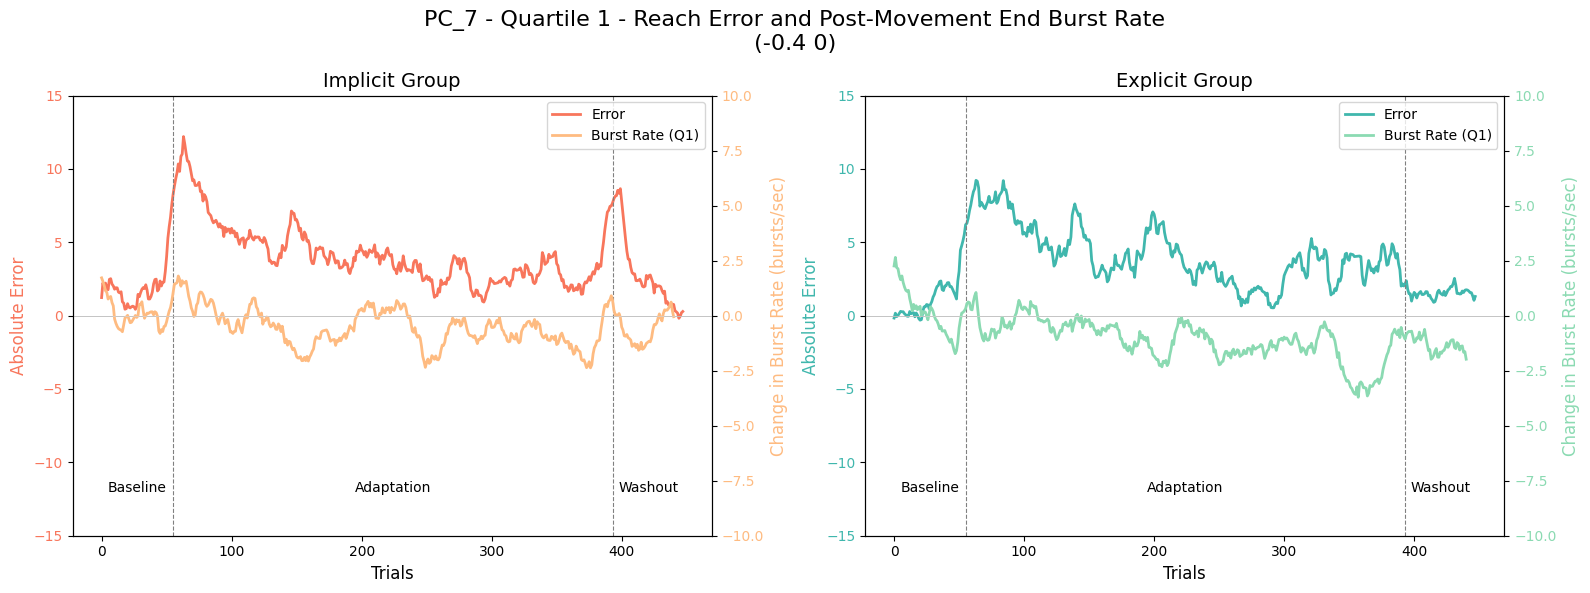

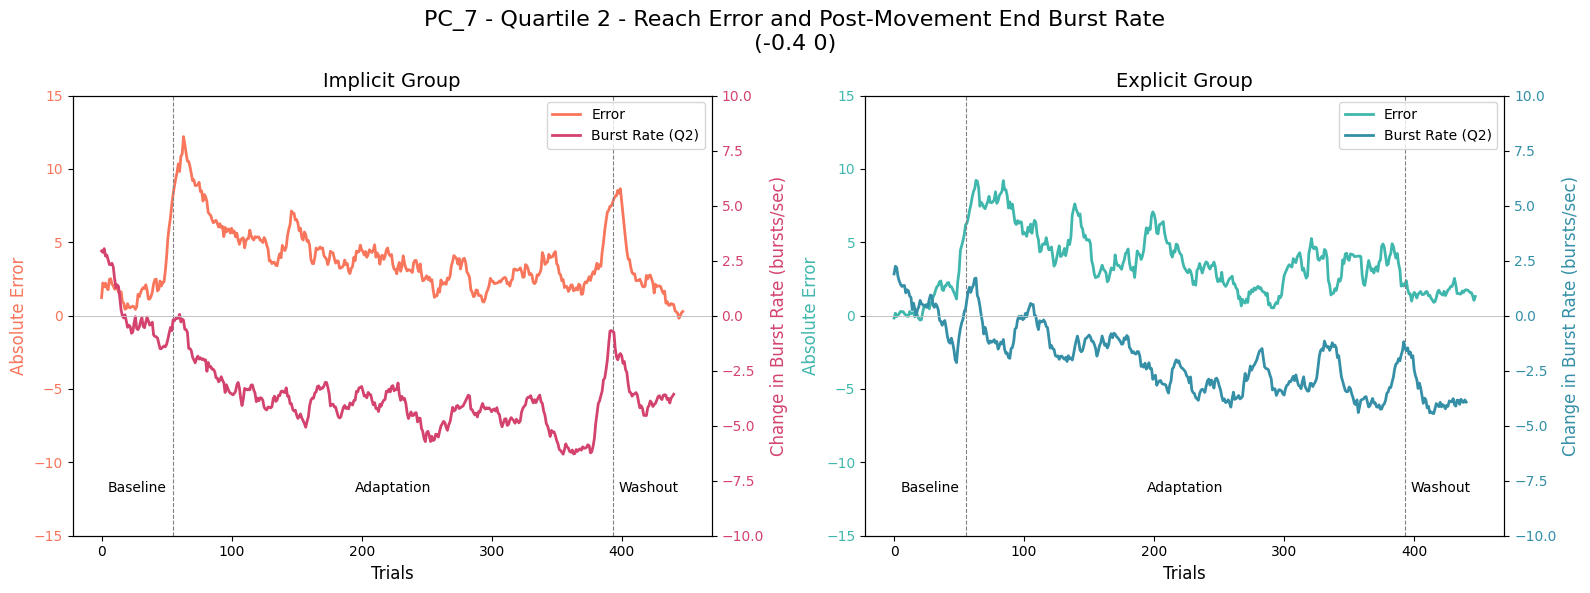

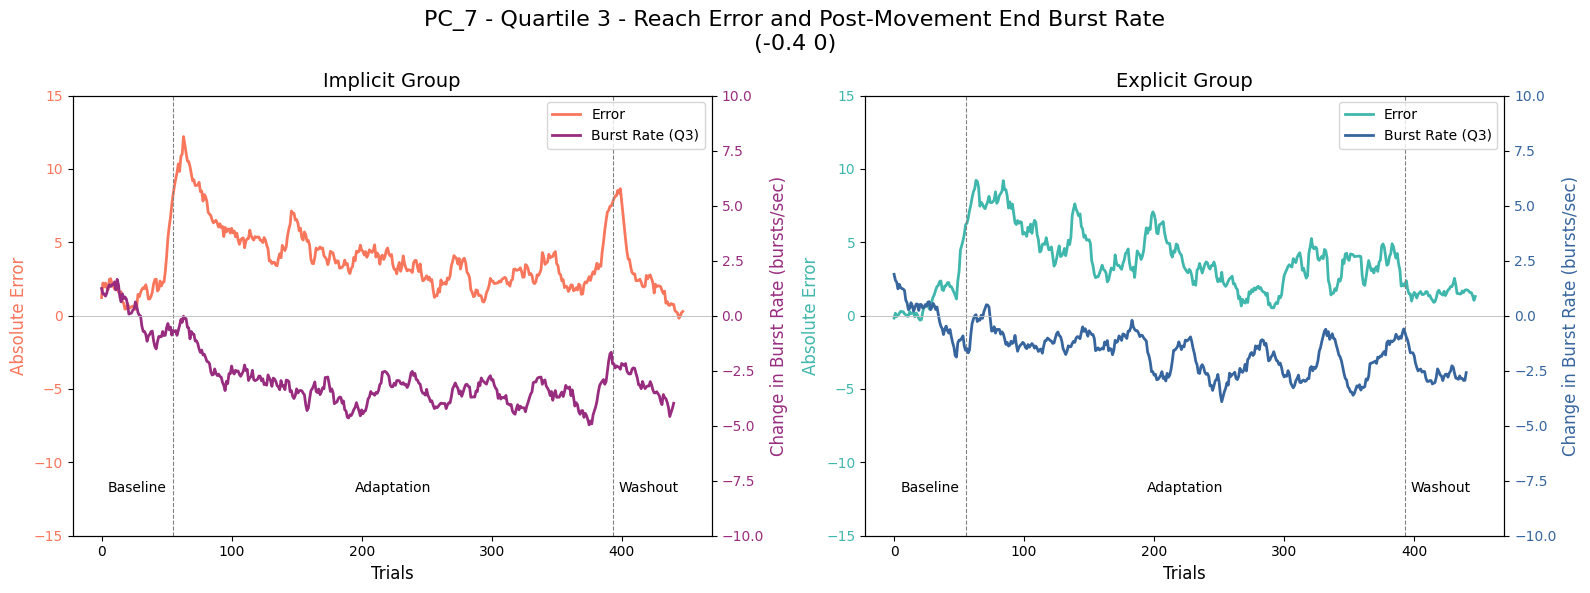

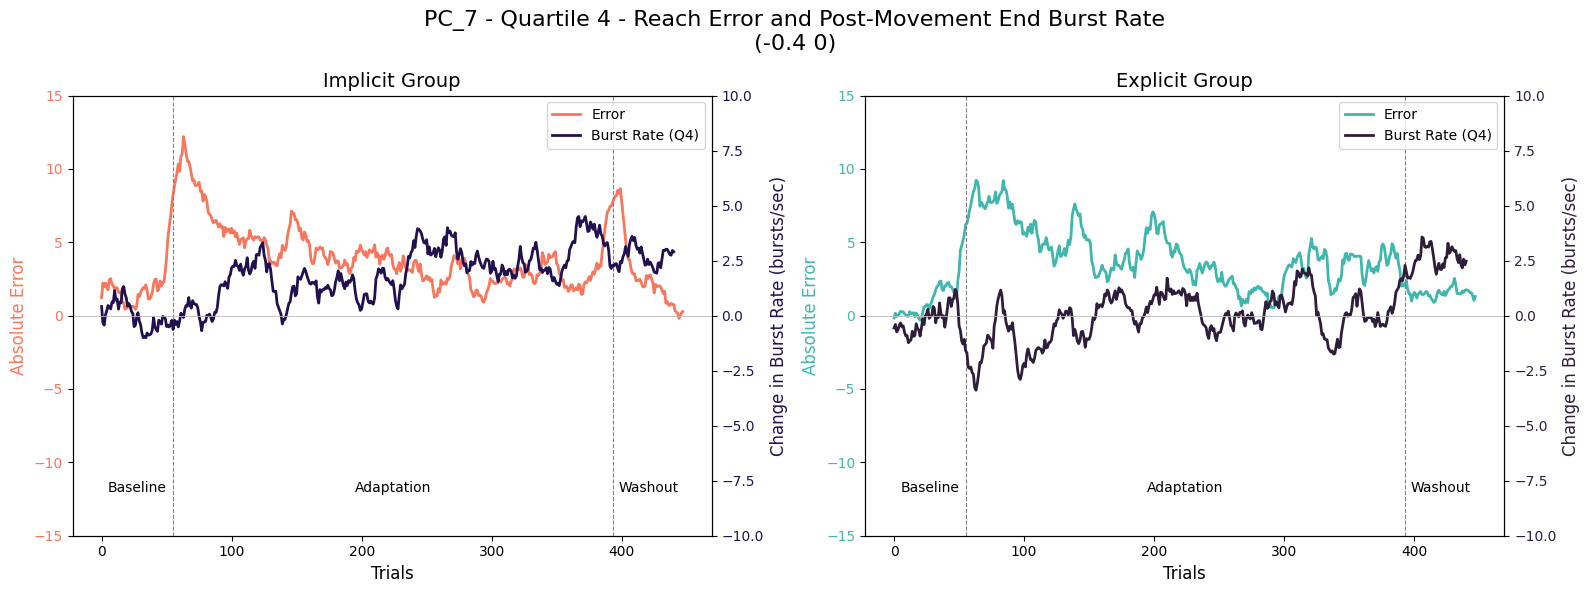

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Moving average function
def moving_average(data, window_size=10):
    """Apply a moving average to smooth data."""
    if window_size % 2 == 0:
        window_size += 1
    
    half_window = window_size // 2
    smoothed_data = []
    
    for i in range(len(data)):
        window_start = max(0, i - half_window)
        window_end = min(len(data), i + half_window + 1)
        window_values = data[window_start:window_end]
        smoothed_data.append(np.mean(window_values))
    
    return np.array(smoothed_data)

# Parameters
pc_key = "PC_7"
time_window_start = -0.4
time_window_end = 0
BASELINE_TRIALS = 55
WASHOUT_TRIALS = 55
window_size = 15

# Setup color palettes
implicit_palette = sns.color_palette("magma_r", 6)
explicit_palette = sns.color_palette("mako_r", 6)
implicit_colors = [implicit_palette[i] for i in [0, 2, 3, 5]]
explicit_colors = [explicit_palette[i] for i in [0, 2, 3, 5]]

# Format window values for file naming
formatted_start = f"{time_window_start:.3f}".rstrip('0').rstrip('.')
formatted_end = f"{time_window_end:.3f}".rstrip('0').rstrip('.')
if formatted_start == '-0': formatted_start = '0'
if formatted_end == '-0': formatted_end = '0'

# Load behavioral data (as provided in your code)
explicit_behav = pd.read_csv(r'C:\Users\qmoreau\Documents\Work\Beta_bursts\Bursts\Behavioral derivatives\behav_df_explicit_trial.csv')
implicit_behav = pd.read_csv(r'C:\Users\qmoreau\Documents\Work\Beta_bursts\Bursts\Behavioral derivatives\behav_df_implicit_trial.csv')

# Implicit group error data
implicit_error_values = np.abs(implicit_behav["reach_vis_err_corrected"].values)
implicit_trial_idx = implicit_behav["trial_idx"].values

# Explicit group error data
explicit_error_values = np.abs(explicit_behav["reach_vis_abs_err_corrected"].values)
explicit_trial_idx = explicit_behav["trial_idx"].values

# Calculate smoothed error values
implicit_error_smooth = moving_average(implicit_error_values, window_size)
explicit_error_smooth = moving_average(explicit_error_values, window_size)

# Load quartile data
def load_quartile_data(quartile_idx):
    filename = f'{pc_key}_Q{quartile_idx+1}_burst_rate_{formatted_start}_to_{formatted_end}.csv'
    try:
        return pd.read_csv(filename)
    except FileNotFoundError:
        print(f"Warning: File {filename} not found. Using empty DataFrame instead.")
        return pd.DataFrame()

# Generate plots for each quartile
for quartile_idx in range(4):
    # Load data for this quartile
    quartile_data = load_quartile_data(quartile_idx)
    
    if quartile_data.empty:
        print(f"No data available for Quartile {quartile_idx+1}, skipping plot.")
        continue
    
    # Separate by group
    implicit_qt_data = quartile_data[quartile_data['group'] == 'Implicit']
    explicit_qt_data = quartile_data[quartile_data['group'] == 'Explicit']
    
    # Create figure with two panels for this quartile
    fig, (ax_implicit, ax_explicit) = plt.subplots(1, 2, figsize=(16, 6), sharex=True)
    fig.subplots_adjust(wspace=0.3)
    
    # Process and plot implicit group
    if not implicit_qt_data.empty:
        # Calculate burst rate stats
        summary = implicit_qt_data.groupby('trial_idx')['burst_rate'].agg(['mean']).reset_index()
        summary = summary.sort_values('trial_idx')
        
        # Baseline correction - calculate baseline mean
        baseline_mean = summary.iloc[:BASELINE_TRIALS]['mean'].mean() if len(summary) >= BASELINE_TRIALS else summary['mean'].mean()
        
        # Apply baseline correction to the entire dataset
        summary['mean_corrected'] = summary['mean'] - baseline_mean
        
        # Apply smoothing to the baseline-corrected data
        summary['smoothed_mean'] = moving_average(summary['mean_corrected'].values, window_size)
        
        # Plot error on primary y-axis
        ax_implicit.plot(implicit_trial_idx, implicit_error_smooth-2.5, '-', 
                        color=implicit_palette[1], linewidth=2, label='Error')
        ax_implicit.set_ylabel('Absolute Error', color=implicit_palette[1], fontsize=12)
        ax_implicit.tick_params(axis='y', labelcolor=implicit_palette[1])
        ax_implicit.set_ylim(-15, 15)
        
        # Create twin axis for burst rate
        ax_implicit_twin = ax_implicit.twinx()
        
        # Plot burst rate using the smoothed and baseline-corrected data
        ax_implicit_twin.plot(summary['trial_idx'], summary['smoothed_mean'], '-',
                             color=implicit_colors[quartile_idx], linewidth=2, 
                             label=f'Burst Rate (Q{quartile_idx+1})')
        
        ax_implicit_twin.set_ylabel('Change in Burst Rate (bursts/sec)', 
                                   color=implicit_colors[quartile_idx], fontsize=12)
        ax_implicit_twin.tick_params(axis='y', labelcolor=implicit_colors[quartile_idx])
        
        # Set fixed y-axis limits for burst rate
        ax_implicit_twin.set_ylim(-10, 10)
        
        # Add phase transition lines
        ax_implicit.axvline(BASELINE_TRIALS, linestyle='--', color='gray', linewidth=0.8)
        ax_implicit.axvline(len(implicit_trial_idx) - WASHOUT_TRIALS, linestyle='--', color='gray', linewidth=0.8)
        ax_implicit.axhline(0, linestyle='-', color='gray', linewidth=0.5)
        ax_implicit_twin.axhline(0, linestyle='-', color='lightgray', linewidth=0.5)
        
        # Create combined legend
        lines_impl, labels_impl = ax_implicit.get_legend_handles_labels()
        lines_impl_twin, labels_impl_twin = ax_implicit_twin.get_legend_handles_labels()
        ax_implicit.legend(lines_impl + lines_impl_twin, 
                          labels_impl + labels_impl_twin, 
                          loc='upper right', fontsize=10)
    else:
        ax_implicit.text(0.5, 0.5, f"No data available for Implicit Group - Q{quartile_idx+1}", 
                        ha='center', va='center', transform=ax_implicit.transAxes)
    
    # Process and plot explicit group
    if not explicit_qt_data.empty:
        # Calculate burst rate stats
        summary = explicit_qt_data.groupby('trial_idx')['burst_rate'].agg(['mean']).reset_index()
        summary = summary.sort_values('trial_idx')
        
        # Baseline correction - calculate baseline mean
        baseline_mean = summary.iloc[:BASELINE_TRIALS]['mean'].mean() if len(summary) >= BASELINE_TRIALS else summary['mean'].mean()
        
        # Apply baseline correction to the entire dataset
        summary['mean_corrected'] = summary['mean'] - baseline_mean
        
        # Apply smoothing to the baseline-corrected data
        summary['smoothed_mean'] = moving_average(summary['mean_corrected'].values, window_size)
        
        # Plot error on primary y-axis
        ax_explicit.plot(explicit_trial_idx, explicit_error_smooth-2.5, '-', 
                        color=explicit_palette[1], linewidth=2, label='Error')
        ax_explicit.set_ylabel('Absolute Error', color=explicit_palette[1], fontsize=12)
        ax_explicit.tick_params(axis='y', labelcolor=explicit_palette[1])
        ax_explicit.set_ylim(-15, 15)
        
        # Create twin axis for burst rate
        ax_explicit_twin = ax_explicit.twinx()
        
        # Plot burst rate using the smoothed and baseline-corrected data
        ax_explicit_twin.plot(summary['trial_idx'], summary['smoothed_mean'], '-',
                             color=explicit_colors[quartile_idx], linewidth=2, 
                             label=f'Burst Rate (Q{quartile_idx+1})')
        
        ax_explicit_twin.set_ylabel('Change in Burst Rate (bursts/sec)', 
                                   color=explicit_colors[quartile_idx], fontsize=12)
        ax_explicit_twin.tick_params(axis='y', labelcolor=explicit_colors[quartile_idx])
        
        # Set fixed y-axis limits for burst rate
        ax_explicit_twin.set_ylim(-10, 10)
        
        # Add phase transition lines
        ax_explicit.axvline(BASELINE_TRIALS, linestyle='--', color='gray', linewidth=0.8)
        ax_explicit.axvline(len(explicit_trial_idx) - WASHOUT_TRIALS, linestyle='--', color='gray', linewidth=0.8)
        ax_explicit.axhline(0, linestyle='-', color='gray', linewidth=0.5)
        ax_explicit_twin.axhline(0, linestyle='-', color='lightgray', linewidth=0.5)
        
        # Create combined legend
        lines_expl, labels_expl = ax_explicit.get_legend_handles_labels()
        lines_expl_twin, labels_expl_twin = ax_explicit_twin.get_legend_handles_labels()
        ax_explicit.legend(lines_expl + lines_expl_twin, 
                          labels_expl + labels_expl_twin, 
                          loc='upper right', fontsize=10)
    else:
        ax_explicit.text(0.5, 0.5, f"No data available for Explicit Group - Q{quartile_idx+1}", 
                        ha='center', va='center', transform=ax_explicit.transAxes)
    
    # Add titles
    ax_implicit.set_title('Implicit Group', fontsize=14)
    ax_explicit.set_title('Explicit Group', fontsize=14)
    
    # Add X-axis labels
    ax_implicit.set_xlabel('Trials', fontsize=12)
    ax_explicit.set_xlabel('Trials', fontsize=12)
    
    # Add phase labels
    baseline_midpoint = BASELINE_TRIALS / 2
    adapt_midpoint = BASELINE_TRIALS + (len(implicit_trial_idx) - WASHOUT_TRIALS - BASELINE_TRIALS) / 2
    washout_midpoint = len(implicit_trial_idx) - WASHOUT_TRIALS + WASHOUT_TRIALS / 2
    
    ax_implicit.text(baseline_midpoint, -12, "Baseline", fontsize=10, ha='center')
    ax_implicit.text(adapt_midpoint, -12, "Adaptation", fontsize=10, ha='center')
    ax_implicit.text(washout_midpoint, -12, "Washout", fontsize=10, ha='center')
    
    ax_explicit.text(baseline_midpoint, -12, "Baseline", fontsize=10, ha='center')
    ax_explicit.text(adapt_midpoint, -12, "Adaptation", fontsize=10, ha='center')
    ax_explicit.text(washout_midpoint, -12, "Washout", fontsize=10, ha='center')
    
    # Main title
    plt.suptitle(f'{pc_key} - Quartile {quartile_idx+1} - Reach Error and Post-Movement End Burst Rate\n ({time_window_start} {time_window_end}) ', fontsize=16)
    plt.tight_layout()

    plt.show()

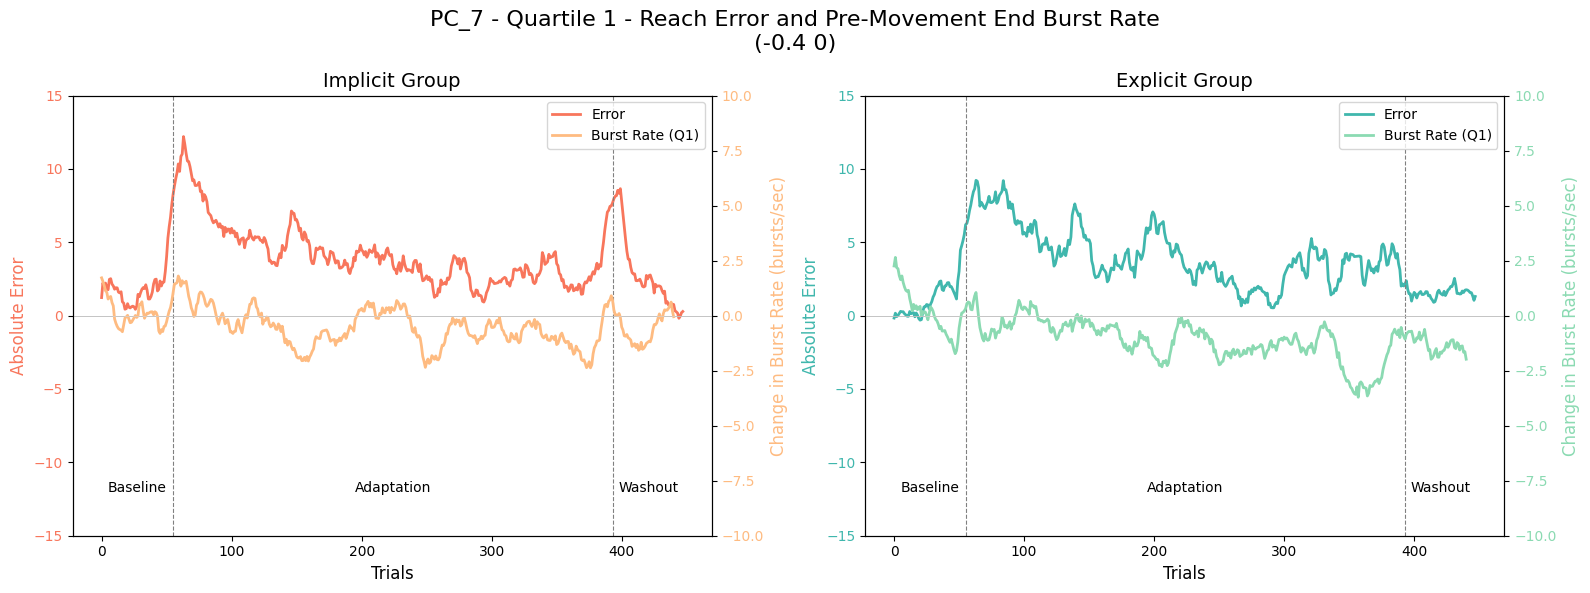

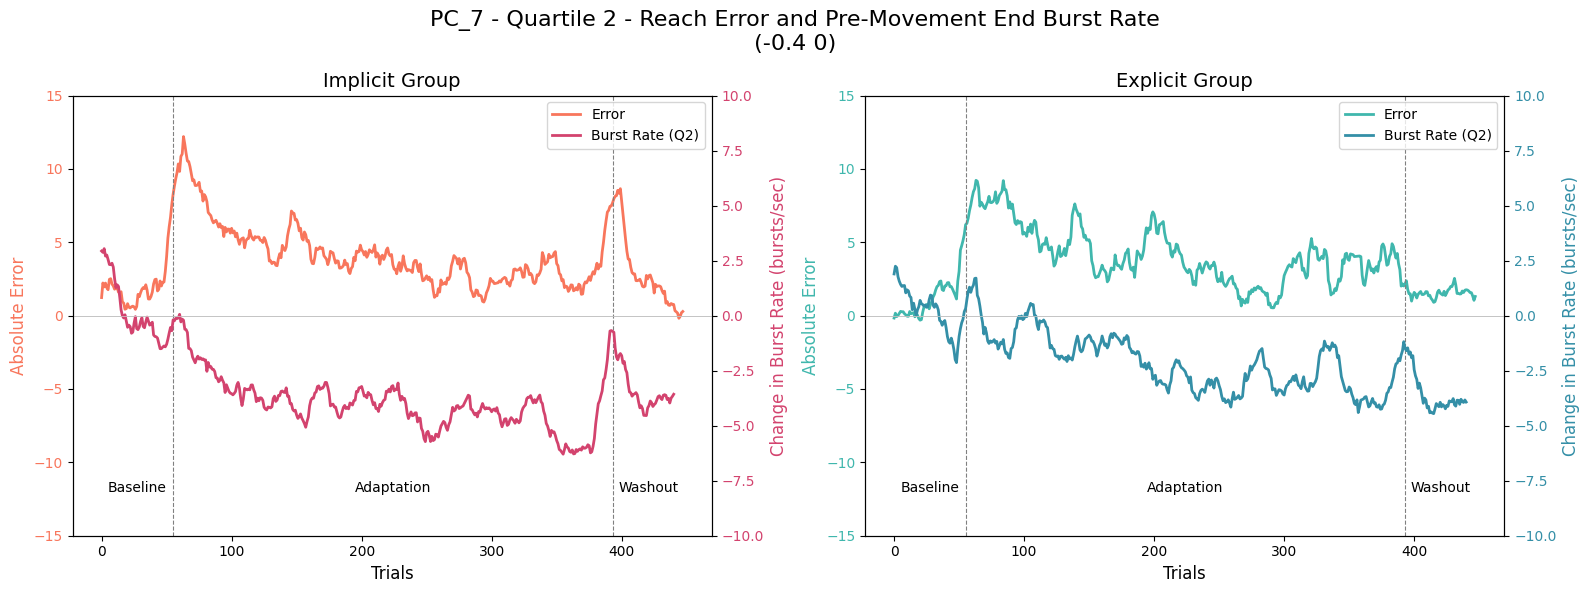

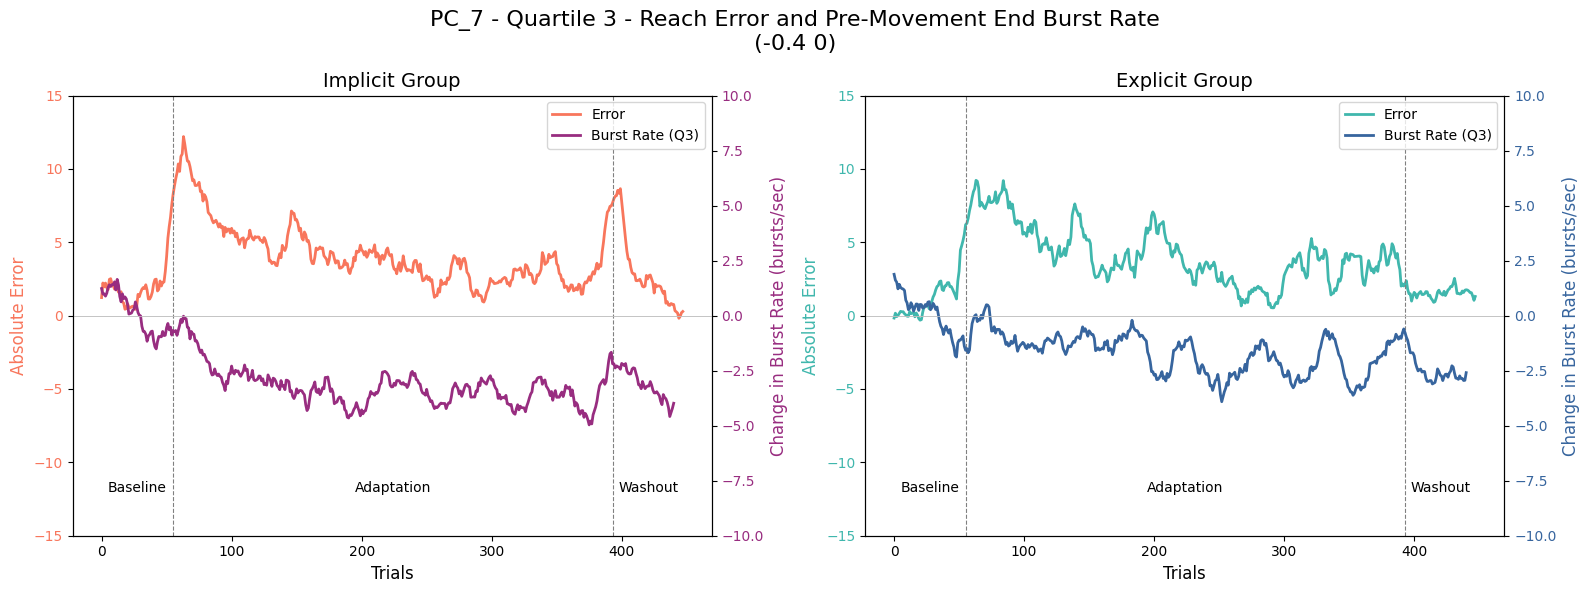

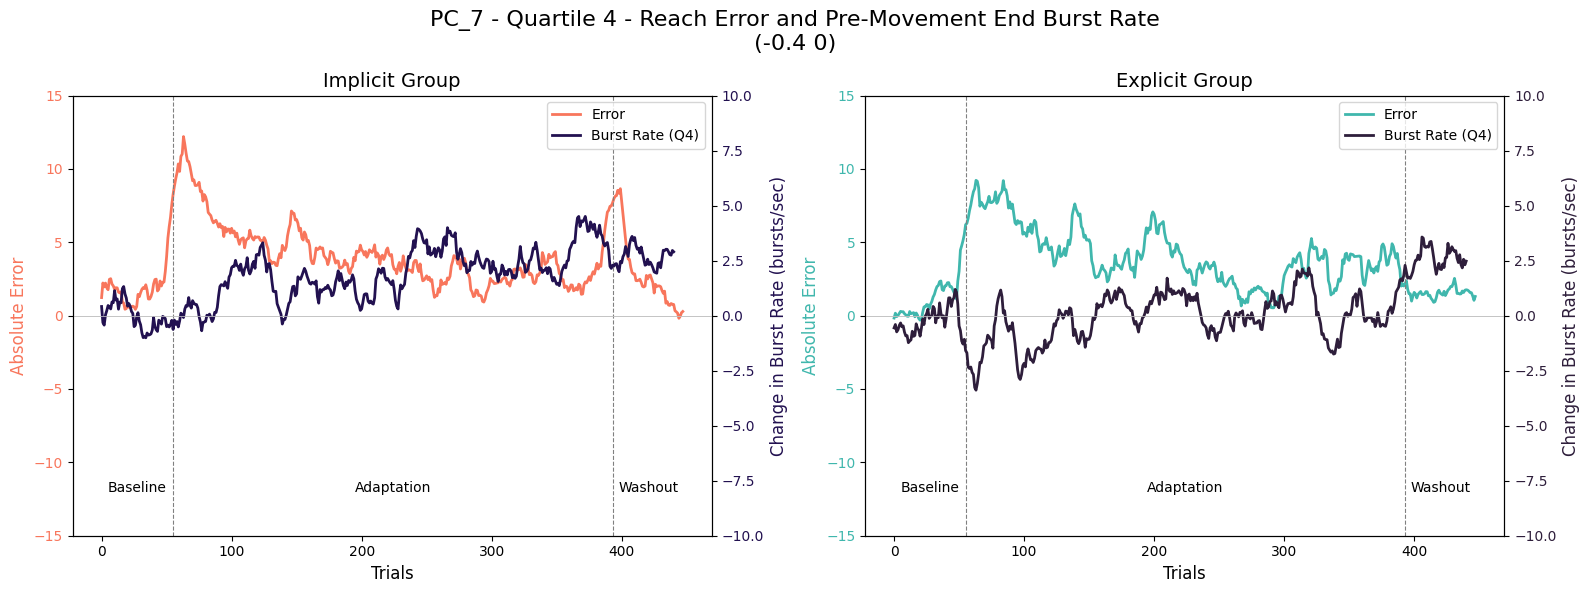

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Moving average function
def moving_average(data, window_size=10):
    """Apply a moving average to smooth data."""
    if window_size % 2 == 0:
        window_size += 1
    
    half_window = window_size // 2
    smoothed_data = []
    
    for i in range(len(data)):
        window_start = max(0, i - half_window)
        window_end = min(len(data), i + half_window + 1)
        window_values = data[window_start:window_end]
        smoothed_data.append(np.mean(window_values))
    
    return np.array(smoothed_data)

# Parameters
pc_key = "PC_7"
time_window_start = -0.4
time_window_end = 0
BASELINE_TRIALS = 55
WASHOUT_TRIALS = 55
window_size = 15

# Setup color palettes
implicit_palette = sns.color_palette("magma_r", 6)
explicit_palette = sns.color_palette("mako_r", 6)
implicit_colors = [implicit_palette[i] for i in [0, 2, 3, 5]]
explicit_colors = [explicit_palette[i] for i in [0, 2, 3, 5]]

# Format window values for file naming
formatted_start = f"{time_window_start:.3f}".rstrip('0').rstrip('.')
formatted_end = f"{time_window_end:.3f}".rstrip('0').rstrip('.')
if formatted_start == '-0': formatted_start = '0'
if formatted_end == '-0': formatted_end = '0'

# Load behavioral data (as provided in your code)
explicit_behav = pd.read_csv(r'C:\Users\qmoreau\Documents\Work\Beta_bursts\Bursts\Behavioral derivatives\behav_df_explicit_trial.csv')
implicit_behav = pd.read_csv(r'C:\Users\qmoreau\Documents\Work\Beta_bursts\Bursts\Behavioral derivatives\behav_df_implicit_trial.csv')

# Implicit group error data
implicit_error_values = np.abs(implicit_behav["reach_vis_err_corrected"].values)
implicit_trial_idx = implicit_behav["trial_idx"].values

# Explicit group error data
explicit_error_values = np.abs(explicit_behav["reach_vis_abs_err_corrected"].values)
explicit_trial_idx = explicit_behav["trial_idx"].values

# Calculate smoothed error values
implicit_error_smooth = moving_average(implicit_error_values, window_size)
explicit_error_smooth = moving_average(explicit_error_values, window_size)

# Load quartile data
def load_quartile_data(quartile_idx):
    filename = f'{pc_key}_Q{quartile_idx+1}_burst_rate_{formatted_start}_to_{formatted_end}.csv'
    try:
        return pd.read_csv(filename)
    except FileNotFoundError:
        print(f"Warning: File {filename} not found. Using empty DataFrame instead.")
        return pd.DataFrame()

# Generate plots for each quartile
for quartile_idx in range(4):
    # Load data for this quartile
    quartile_data = load_quartile_data(quartile_idx)
    
    if quartile_data.empty:
        print(f"No data available for Quartile {quartile_idx+1}, skipping plot.")
        continue
    
    # Separate by group
    implicit_qt_data = quartile_data[quartile_data['group'] == 'Implicit']
    explicit_qt_data = quartile_data[quartile_data['group'] == 'Explicit']
    
    # Create figure with two panels for this quartile
    fig, (ax_implicit, ax_explicit) = plt.subplots(1, 2, figsize=(16, 6), sharex=True)
    fig.subplots_adjust(wspace=0.3)
    
    # Process and plot implicit group
    if not implicit_qt_data.empty:
        # Calculate burst rate stats
        summary = implicit_qt_data.groupby('trial_idx')['burst_rate'].agg(['mean']).reset_index()
        summary = summary.sort_values('trial_idx')
        
        # Baseline correction - calculate baseline mean
        baseline_mean = summary.iloc[:BASELINE_TRIALS]['mean'].mean() if len(summary) >= BASELINE_TRIALS else summary['mean'].mean()
        
        # Apply baseline correction to the entire dataset
        summary['mean_corrected'] = summary['mean'] - baseline_mean
        
        # Apply smoothing to the baseline-corrected data
        summary['smoothed_mean'] = moving_average(summary['mean_corrected'].values, window_size)
        
        # Plot error on primary y-axis
        ax_implicit.plot(implicit_trial_idx, implicit_error_smooth-2.5, '-', 
                        color=implicit_palette[1], linewidth=2, label='Error')
        ax_implicit.set_ylabel('Absolute Error', color=implicit_palette[1], fontsize=12)
        ax_implicit.tick_params(axis='y', labelcolor=implicit_palette[1])
        ax_implicit.set_ylim(-15, 15)
        
        # Create twin axis for burst rate
        ax_implicit_twin = ax_implicit.twinx()
        
        # Plot burst rate using the smoothed and baseline-corrected data
        ax_implicit_twin.plot(summary['trial_idx'], summary['smoothed_mean'], '-',
                             color=implicit_colors[quartile_idx], linewidth=2, 
                             label=f'Burst Rate (Q{quartile_idx+1})')
        
        ax_implicit_twin.set_ylabel('Change in Burst Rate (bursts/sec)', 
                                   color=implicit_colors[quartile_idx], fontsize=12)
        ax_implicit_twin.tick_params(axis='y', labelcolor=implicit_colors[quartile_idx])
        
        # Set fixed y-axis limits for burst rate
        ax_implicit_twin.set_ylim(-10, 10)
        
        # Add phase transition lines
        ax_implicit.axvline(BASELINE_TRIALS, linestyle='--', color='gray', linewidth=0.8)
        ax_implicit.axvline(len(implicit_trial_idx) - WASHOUT_TRIALS, linestyle='--', color='gray', linewidth=0.8)
        ax_implicit.axhline(0, linestyle='-', color='gray', linewidth=0.5)
        ax_implicit_twin.axhline(0, linestyle='-', color='lightgray', linewidth=0.5)
        
        # Create combined legend
        lines_impl, labels_impl = ax_implicit.get_legend_handles_labels()
        lines_impl_twin, labels_impl_twin = ax_implicit_twin.get_legend_handles_labels()
        ax_implicit.legend(lines_impl + lines_impl_twin, 
                          labels_impl + labels_impl_twin, 
                          loc='upper right', fontsize=10)
    else:
        ax_implicit.text(0.5, 0.5, f"No data available for Implicit Group - Q{quartile_idx+1}", 
                        ha='center', va='center', transform=ax_implicit.transAxes)
    
    # Process and plot explicit group
    if not explicit_qt_data.empty:
        # Calculate burst rate stats
        summary = explicit_qt_data.groupby('trial_idx')['burst_rate'].agg(['mean']).reset_index()
        summary = summary.sort_values('trial_idx')
        
        # Baseline correction - calculate baseline mean
        baseline_mean = summary.iloc[:BASELINE_TRIALS]['mean'].mean() if len(summary) >= BASELINE_TRIALS else summary['mean'].mean()
        
        # Apply baseline correction to the entire dataset
        summary['mean_corrected'] = summary['mean'] - baseline_mean
        
        # Apply smoothing to the baseline-corrected data
        summary['smoothed_mean'] = moving_average(summary['mean_corrected'].values, window_size)
        
        # Plot error on primary y-axis
        ax_explicit.plot(explicit_trial_idx, explicit_error_smooth-2.5, '-', 
                        color=explicit_palette[1], linewidth=2, label='Error')
        ax_explicit.set_ylabel('Absolute Error', color=explicit_palette[1], fontsize=12)
        ax_explicit.tick_params(axis='y', labelcolor=explicit_palette[1])
        ax_explicit.set_ylim(-15, 15)
        
        # Create twin axis for burst rate
        ax_explicit_twin = ax_explicit.twinx()
        
        # Plot burst rate using the smoothed and baseline-corrected data
        ax_explicit_twin.plot(summary['trial_idx'], summary['smoothed_mean'], '-',
                             color=explicit_colors[quartile_idx], linewidth=2, 
                             label=f'Burst Rate (Q{quartile_idx+1})')
        
        ax_explicit_twin.set_ylabel('Change in Burst Rate (bursts/sec)', 
                                   color=explicit_colors[quartile_idx], fontsize=12)
        ax_explicit_twin.tick_params(axis='y', labelcolor=explicit_colors[quartile_idx])
        
        # Set fixed y-axis limits for burst rate
        ax_explicit_twin.set_ylim(-10, 10)
        
        # Add phase transition lines
        ax_explicit.axvline(BASELINE_TRIALS, linestyle='--', color='gray', linewidth=0.8)
        ax_explicit.axvline(len(explicit_trial_idx) - WASHOUT_TRIALS, linestyle='--', color='gray', linewidth=0.8)
        ax_explicit.axhline(0, linestyle='-', color='gray', linewidth=0.5)
        ax_explicit_twin.axhline(0, linestyle='-', color='lightgray', linewidth=0.5)
        
        # Create combined legend
        lines_expl, labels_expl = ax_explicit.get_legend_handles_labels()
        lines_expl_twin, labels_expl_twin = ax_explicit_twin.get_legend_handles_labels()
        ax_explicit.legend(lines_expl + lines_expl_twin, 
                          labels_expl + labels_expl_twin, 
                          loc='upper right', fontsize=10)
    else:
        ax_explicit.text(0.5, 0.5, f"No data available for Explicit Group - Q{quartile_idx+1}", 
                        ha='center', va='center', transform=ax_explicit.transAxes)
    
    # Add titles
    ax_implicit.set_title('Implicit Group', fontsize=14)
    ax_explicit.set_title('Explicit Group', fontsize=14)
    
    # Add X-axis labels
    ax_implicit.set_xlabel('Trials', fontsize=12)
    ax_explicit.set_xlabel('Trials', fontsize=12)
    
    # Add phase labels
    baseline_midpoint = BASELINE_TRIALS / 2
    adapt_midpoint = BASELINE_TRIALS + (len(implicit_trial_idx) - WASHOUT_TRIALS - BASELINE_TRIALS) / 2
    washout_midpoint = len(implicit_trial_idx) - WASHOUT_TRIALS + WASHOUT_TRIALS / 2
    
    ax_implicit.text(baseline_midpoint, -12, "Baseline", fontsize=10, ha='center')
    ax_implicit.text(adapt_midpoint, -12, "Adaptation", fontsize=10, ha='center')
    ax_implicit.text(washout_midpoint, -12, "Washout", fontsize=10, ha='center')
    
    ax_explicit.text(baseline_midpoint, -12, "Baseline", fontsize=10, ha='center')
    ax_explicit.text(adapt_midpoint, -12, "Adaptation", fontsize=10, ha='center')
    ax_explicit.text(washout_midpoint, -12, "Washout", fontsize=10, ha='center')
    
    # Main title
    plt.suptitle(f'{pc_key} - Quartile {quartile_idx+1} - Reach Error and Pre-Movement End Burst Rate\n ({time_window_start} {time_window_end}) ', fontsize=16)
    plt.tight_layout()

    plt.show()

In [46]:
# Moving average function
def moving_average(data, window_size=10):
    """Apply a moving average to smooth data."""
    if window_size % 2 == 0:
        window_size += 1
    
    half_window = window_size // 2
    smoothed_data = []
    
    for i in range(len(data)):
        window_start = max(0, i - half_window)
        window_end = min(len(data), i + half_window + 1)
        window_values = data[window_start:window_end]
        smoothed_data.append(np.mean(window_values))
    
    return np.array(smoothed_data)

# Parameters
pc_key = "PC_7"
time_window_start = 0.25
time_window_end = 0.75
BASELINE_TRIALS = 55
WASHOUT_TRIALS = 55
window_size = 15

# Setup color palettes
implicit_palette = sns.color_palette("magma_r", 6)
explicit_palette = sns.color_palette("mako_r", 6)
implicit_colors = [implicit_palette[i] for i in [0, 2, 3, 5]]
explicit_colors = [explicit_palette[i] for i in [0, 2, 3, 5]]

# Format window values for file naming
formatted_start = f"{time_window_start:.3f}".rstrip('0').rstrip('.')
formatted_end = f"{time_window_end:.3f}".rstrip('0').rstrip('.')
if formatted_start == '-0': formatted_start = '0'
if formatted_end == '-0': formatted_end = '0'

# Implicit group error data
implicit_error_values = np.abs(implicit_behav["reach_vis_err_corrected"].values)
implicit_trial_idx = implicit_behav["trial_idx"].values

# Explicit group error data
explicit_error_values = np.abs(explicit_behav["reach_vis_abs_err_corrected"].values)
explicit_trial_idx = explicit_behav["trial_idx"].values

# Calculate smoothed error values
implicit_error_smooth = moving_average(implicit_error_values, window_size)
explicit_error_smooth = moving_average(explicit_error_values, window_size)

# Load quartile data
def load_quartile_data(quartile_idx):
    filename = f'{pc_key}_Q{quartile_idx+1}_burst_rate_{formatted_start}_to_{formatted_end}.csv'
    try:
        return pd.read_csv(filename)
    except FileNotFoundError:
        print(f"Warning: File {filename} not found. Using empty DataFrame instead.")
        return pd.DataFrame()

# Generate plots for each quartile
for quartile_idx in range(4):
    # Load data for this quartile
    quartile_data = load_quartile_data(quartile_idx)
    
    if quartile_data.empty:
        print(f"No data available for Quartile {quartile_idx+1}, skipping plot.")
        continue
    
    # Separate by group
    implicit_qt_data = quartile_data[quartile_data['group'] == 'Implicit']
    explicit_qt_data = quartile_data[quartile_data['group'] == 'Explicit']
    
    # Create figure with two panels for this quartile
    fig, (ax_implicit, ax_explicit) = plt.subplots(1, 2, figsize=(16, 6), sharex=True)
    fig.subplots_adjust(wspace=0.3)
    
    # Process and plot implicit group
    if not implicit_qt_data.empty:
        # Calculate burst rate stats
        summary = implicit_qt_data.groupby('trial_idx')['burst_rate'].agg(['mean']).reset_index()
        summary = summary.sort_values('trial_idx')
        
        # Baseline correction - calculate baseline mean
        baseline_mean = summary.iloc[:BASELINE_TRIALS]['mean'].mean() if len(summary) >= BASELINE_TRIALS else summary['mean'].mean()
        
        # Apply baseline correction to the entire dataset
        summary['mean_corrected'] = summary['mean'] - baseline_mean
        
        # Apply smoothing to the baseline-corrected data
        summary['smoothed_mean'] = moving_average(summary['mean_corrected'].values, window_size)
        
        # Plot error on primary y-axis
        ax_implicit.plot(implicit_trial_idx, implicit_error_smooth-2.5, '-', 
                        color=implicit_palette[1], linewidth=2, label='Error')
        ax_implicit.set_ylabel('Absolute Error', color=implicit_palette[1], fontsize=12)
        ax_implicit.tick_params(axis='y', labelcolor=implicit_palette[1])
        ax_implicit.set_ylim(-15, 15)
        
        # Create twin axis for burst rate
        ax_implicit_twin = ax_implicit.twinx()
        
        # Plot burst rate using the smoothed and baseline-corrected data
        ax_implicit_twin.plot(summary['trial_idx'], summary['smoothed_mean'], '-',
                             color=implicit_colors[quartile_idx], linewidth=2, 
                             label=f'Burst Rate (Q{quartile_idx+1})')
        
        ax_implicit_twin.set_ylabel('Change in Burst Rate (bursts/sec)', 
                                   color=implicit_colors[quartile_idx], fontsize=12)
        ax_implicit_twin.tick_params(axis='y', labelcolor=implicit_colors[quartile_idx])
        
        # Set fixed y-axis limits for burst rate
        ax_implicit_twin.set_ylim(-10, 10)
        
        # Add phase transition lines
        ax_implicit.axvline(BASELINE_TRIALS, linestyle='--', color='gray', linewidth=0.8)
        ax_implicit.axvline(len(implicit_trial_idx) - WASHOUT_TRIALS, linestyle='--', color='gray', linewidth=0.8)
        ax_implicit.axhline(0, linestyle='-', color='gray', linewidth=0.5)
        ax_implicit_twin.axhline(0, linestyle='-', color='lightgray', linewidth=0.5)
        
        # Create combined legend
        lines_impl, labels_impl = ax_implicit.get_legend_handles_labels()
        lines_impl_twin, labels_impl_twin = ax_implicit_twin.get_legend_handles_labels()
        ax_implicit.legend(lines_impl + lines_impl_twin, 
                          labels_impl + labels_impl_twin, 
                          loc='upper right', fontsize=10)
    else:
        ax_implicit.text(0.5, 0.5, f"No data available for Implicit Group - Q{quartile_idx+1}", 
                        ha='center', va='center', transform=ax_implicit.transAxes)
    
    # Process and plot explicit group
    if not explicit_qt_data.empty:
        # Calculate burst rate stats
        summary = explicit_qt_data.groupby('trial_idx')['burst_rate'].agg(['mean']).reset_index()
        summary = summary.sort_values('trial_idx')
        
        # Baseline correction - calculate baseline mean
        baseline_mean = summary.iloc[:BASELINE_TRIALS]['mean'].mean() if len(summary) >= BASELINE_TRIALS else summary['mean'].mean()
        
        # Apply baseline correction to the entire dataset
        summary['mean_corrected'] = summary['mean'] - baseline_mean
        
        # Apply smoothing to the baseline-corrected data
        summary['smoothed_mean'] = moving_average(summary['mean_corrected'].values, window_size)
        
        # Plot error on primary y-axis
        ax_explicit.plot(explicit_trial_idx, explicit_error_smooth-2.5, '-', 
                        color=explicit_palette[1], linewidth=2, label='Error')
        ax_explicit.set_ylabel('Absolute Error', color=explicit_palette[1], fontsize=12)
        ax_explicit.tick_params(axis='y', labelcolor=explicit_palette[1])
        ax_explicit.set_ylim(-15, 15)
        
        # Create twin axis for burst rate
        ax_explicit_twin = ax_explicit.twinx()
        
        # Plot burst rate using the smoothed and baseline-corrected data
        ax_explicit_twin.plot(summary['trial_idx'], summary['smoothed_mean'], '-',
                             color=explicit_colors[quartile_idx], linewidth=2, 
                             label=f'Burst Rate (Q{quartile_idx+1})')
        
        ax_explicit_twin.set_ylabel('Change in Burst Rate (bursts/sec)', 
                                   color=explicit_colors[quartile_idx], fontsize=12)
        ax_explicit_twin.tick_params(axis='y', labelcolor=explicit_colors[quartile_idx])
        
        # Set fixed y-axis limits for burst rate
        ax_explicit_twin.set_ylim(-10, 10)
        
        # Add phase transition lines
        ax_explicit.axvline(BASELINE_TRIALS, linestyle='--', color='gray', linewidth=0.8)
        ax_explicit.axvline(len(explicit_trial_idx) - WASHOUT_TRIALS, linestyle='--', color='gray', linewidth=0.8)
        ax_explicit.axhline(0, linestyle='-', color='gray', linewidth=0.5)
        ax_explicit_twin.axhline(0, linestyle='-', color='lightgray', linewidth=0.5)
        
        # Create combined legend
        lines_expl, labels_expl = ax_explicit.get_legend_handles_labels()
        lines_expl_twin, labels_expl_twin = ax_explicit_twin.get_legend_handles_labels()
        ax_explicit.legend(lines_expl + lines_expl_twin, 
                          labels_expl + labels_expl_twin, 
                          loc='upper right', fontsize=10)
    else:
        ax_explicit.text(0.5, 0.5, f"No data available for Explicit Group - Q{quartile_idx+1}", 
                        ha='center', va='center', transform=ax_explicit.transAxes)
    
    # Add titles
    ax_implicit.set_title('Implicit Group', fontsize=14)
    ax_explicit.set_title('Explicit Group', fontsize=14)
    
    # Add X-axis labels
    ax_implicit.set_xlabel('Trials', fontsize=12)
    ax_explicit.set_xlabel('Trials', fontsize=12)
    
    # Add phase labels
    baseline_midpoint = BASELINE_TRIALS / 2
    adapt_midpoint = BASELINE_TRIALS + (len(implicit_trial_idx) - WASHOUT_TRIALS - BASELINE_TRIALS) / 2
    washout_midpoint = len(implicit_trial_idx) - WASHOUT_TRIALS + WASHOUT_TRIALS / 2
    
    ax_implicit.text(baseline_midpoint, -12, "Baseline", fontsize=10, ha='center')
    ax_implicit.text(adapt_midpoint, -12, "Adaptation", fontsize=10, ha='center')
    ax_implicit.text(washout_midpoint, -12, "Washout", fontsize=10, ha='center')
    
    ax_explicit.text(baseline_midpoint, -12, "Baseline", fontsize=10, ha='center')
    ax_explicit.text(adapt_midpoint, -12, "Adaptation", fontsize=10, ha='center')
    ax_explicit.text(washout_midpoint, -12, "Washout", fontsize=10, ha='center')
    
    # Main title
    plt.suptitle(f'{pc_key} - Quartile {quartile_idx+1} - Reach Error and Post-Movement End Burst Rate\n ({time_window_start} {time_window_end}) ', fontsize=16)
    plt.tight_layout()

    plt.show()

No data available for Quartile 1, skipping plot.
No data available for Quartile 2, skipping plot.
No data available for Quartile 3, skipping plot.
No data available for Quartile 4, skipping plot.


In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Moving average function
def moving_average(data, window_size=10):
    """Apply a moving average to smooth data."""
    if window_size % 2 == 0:
        window_size += 1
    
    half_window = window_size // 2
    smoothed_data = []
    
    for i in range(len(data)):
        window_start = max(0, i - half_window)
        window_end = min(len(data), i + half_window + 1)
        window_values = data[window_start:window_end]
        smoothed_data.append(np.mean(window_values))
    
    return np.array(smoothed_data)

# Parameters
pc_key = "PC_7"
time_window_start = 0.25
time_window_end = 0.75
BASELINE_TRIALS = 55
WASHOUT_TRIALS = 55
window_size = 15

# Setup color palettes
implicit_palette = sns.color_palette("magma_r", 6)
explicit_palette = sns.color_palette("mako_r", 6)
implicit_colors = [implicit_palette[i] for i in [0, 2, 3, 5]]
explicit_colors = [explicit_palette[i] for i in [0, 2, 3, 5]]

# Format window values for file naming
formatted_start = f"{time_window_start:.3f}".rstrip('0').rstrip('.')
formatted_end = f"{time_window_end:.3f}".rstrip('0').rstrip('.')
if formatted_start == '-0': formatted_start = '0'
if formatted_end == '-0': formatted_end = '0'

# Implicit group error data
implicit_error_values = np.abs(implicit_behav["reach_vis_err_corrected"].values)
implicit_trial_idx = implicit_behav["trial_idx"].values

# Explicit group error data
explicit_error_values = np.abs(explicit_behav["reach_vis_abs_err_corrected"].values)
explicit_trial_idx = explicit_behav["trial_idx"].values

# Calculate smoothed error values
implicit_error_smooth = moving_average(implicit_error_values, window_size)
explicit_error_smooth = moving_average(explicit_error_values, window_size)

# Load quartile data
def load_quartile_data(quartile_idx):
    filename = f'{pc_key}_Q{quartile_idx+1}_burst_rate_{formatted_start}_to_{formatted_end}.csv'
    try:
        return pd.read_csv(filename)
    except FileNotFoundError:
        print(f"Warning: File {filename} not found. Using empty DataFrame instead.")
        return pd.DataFrame()

# Generate plots for each quartile
for quartile_idx in range(4):
    # Load data for this quartile
    quartile_data = load_quartile_data(quartile_idx)
    
    if quartile_data.empty:
        print(f"No data available for Quartile {quartile_idx+1}, skipping plot.")
        continue
    
    # Separate by group
    implicit_qt_data = quartile_data[quartile_data['group'] == 'Implicit']
    explicit_qt_data = quartile_data[quartile_data['group'] == 'Explicit']
    
    # Create figure with two panels for this quartile
    fig, (ax_implicit, ax_explicit) = plt.subplots(1, 2, figsize=(16, 6), sharex=True)
    fig.subplots_adjust(wspace=0.3)
    
    # Process and plot implicit group
    if not implicit_qt_data.empty:
        # Calculate burst rate stats
        summary = implicit_qt_data.groupby('trial_idx')['burst_rate'].agg(['mean']).reset_index()
        summary = summary.sort_values('trial_idx')
        
        # Baseline correction - calculate baseline mean
        baseline_mean = summary.iloc[:BASELINE_TRIALS]['mean'].mean() if len(summary) >= BASELINE_TRIALS else summary['mean'].mean()
        
        # Apply baseline correction to the entire dataset
        summary['mean_corrected'] = summary['mean'] - baseline_mean
        
        # Apply smoothing to the baseline-corrected data
        summary['smoothed_mean'] = moving_average(summary['mean_corrected'].values, window_size)
        
        # Plot error on primary y-axis
        ax_implicit.plot(implicit_trial_idx, implicit_error_smooth-2.5, '-', 
                        color=implicit_palette[1], linewidth=2, label='Error')
        ax_implicit.set_ylabel('Absolute Error', color=implicit_palette[1], fontsize=12)
        ax_implicit.tick_params(axis='y', labelcolor=implicit_palette[1])
        ax_implicit.set_ylim(-15, 15)
        
        # Create twin axis for burst rate
        ax_implicit_twin = ax_implicit.twinx()
        
        # Plot burst rate using the smoothed and baseline-corrected data
        ax_implicit_twin.plot(summary['trial_idx'], summary['smoothed_mean'], '-',
                             color=implicit_colors[quartile_idx], linewidth=2, 
                             label=f'Burst Rate (Q{quartile_idx+1})')
        
        ax_implicit_twin.set_ylabel('Change in Burst Rate (bursts/sec)', 
                                   color=implicit_colors[quartile_idx], fontsize=12)
        ax_implicit_twin.tick_params(axis='y', labelcolor=implicit_colors[quartile_idx])
        
        # Set fixed y-axis limits for burst rate
        ax_implicit_twin.set_ylim(-10, 10)
        
        # Add phase transition lines
        ax_implicit.axvline(BASELINE_TRIALS, linestyle='--', color='gray', linewidth=0.8)
        ax_implicit.axvline(len(implicit_trial_idx) - WASHOUT_TRIALS, linestyle='--', color='gray', linewidth=0.8)
        ax_implicit.axhline(0, linestyle='-', color='gray', linewidth=0.5)
        ax_implicit_twin.axhline(0, linestyle='-', color='lightgray', linewidth=0.5)
        
        # Create combined legend
        lines_impl, labels_impl = ax_implicit.get_legend_handles_labels()
        lines_impl_twin, labels_impl_twin = ax_implicit_twin.get_legend_handles_labels()
        ax_implicit.legend(lines_impl + lines_impl_twin, 
                          labels_impl + labels_impl_twin, 
                          loc='upper right', fontsize=10)
    else:
        ax_implicit.text(0.5, 0.5, f"No data available for Implicit Group - Q{quartile_idx+1}", 
                        ha='center', va='center', transform=ax_implicit.transAxes)
    
    # Process and plot explicit group
    if not explicit_qt_data.empty:
        # Calculate burst rate stats
        summary = explicit_qt_data.groupby('trial_idx')['burst_rate'].agg(['mean']).reset_index()
        summary = summary.sort_values('trial_idx')
        
        # Baseline correction - calculate baseline mean
        baseline_mean = summary.iloc[:BASELINE_TRIALS]['mean'].mean() if len(summary) >= BASELINE_TRIALS else summary['mean'].mean()
        
        # Apply baseline correction to the entire dataset
        summary['mean_corrected'] = summary['mean'] - baseline_mean
        
        # Apply smoothing to the baseline-corrected data
        summary['smoothed_mean'] = moving_average(summary['mean_corrected'].values, window_size)
        
        # Plot error on primary y-axis
        ax_explicit.plot(explicit_trial_idx, explicit_error_smooth-2.5, '-', 
                        color=explicit_palette[1], linewidth=2, label='Error')
        ax_explicit.set_ylabel('Absolute Error', color=explicit_palette[1], fontsize=12)
        ax_explicit.tick_params(axis='y', labelcolor=explicit_palette[1])
        ax_explicit.set_ylim(-15, 15)
        
        # Create twin axis for burst rate
        ax_explicit_twin = ax_explicit.twinx()
        
        # Plot burst rate using the smoothed and baseline-corrected data
        ax_explicit_twin.plot(summary['trial_idx'], summary['smoothed_mean'], '-',
                             color=explicit_colors[quartile_idx], linewidth=2, 
                             label=f'Burst Rate (Q{quartile_idx+1})')
        
        ax_explicit_twin.set_ylabel('Change in Burst Rate (bursts/sec)', 
                                   color=explicit_colors[quartile_idx], fontsize=12)
        ax_explicit_twin.tick_params(axis='y', labelcolor=explicit_colors[quartile_idx])
        
        # Set fixed y-axis limits for burst rate
        ax_explicit_twin.set_ylim(-10, 10)
        
        # Add phase transition lines
        ax_explicit.axvline(BASELINE_TRIALS, linestyle='--', color='gray', linewidth=0.8)
        ax_explicit.axvline(len(explicit_trial_idx) - WASHOUT_TRIALS, linestyle='--', color='gray', linewidth=0.8)
        ax_explicit.axhline(0, linestyle='-', color='gray', linewidth=0.5)
        ax_explicit_twin.axhline(0, linestyle='-', color='lightgray', linewidth=0.5)
        
        # Create combined legend
        lines_expl, labels_expl = ax_explicit.get_legend_handles_labels()
        lines_expl_twin, labels_expl_twin = ax_explicit_twin.get_legend_handles_labels()
        ax_explicit.legend(lines_expl + lines_expl_twin, 
                          labels_expl + labels_expl_twin, 
                          loc='upper right', fontsize=10)
    else:
        ax_explicit.text(0.5, 0.5, f"No data available for Explicit Group - Q{quartile_idx+1}", 
                        ha='center', va='center', transform=ax_explicit.transAxes)
    
    # Add titles
    ax_implicit.set_title('Implicit Group', fontsize=14)
    ax_explicit.set_title('Explicit Group', fontsize=14)
    
    # Add X-axis labels
    ax_implicit.set_xlabel('Trials', fontsize=12)
    ax_explicit.set_xlabel('Trials', fontsize=12)
    
    # Add phase labels
    baseline_midpoint = BASELINE_TRIALS / 2
    adapt_midpoint = BASELINE_TRIALS + (len(implicit_trial_idx) - WASHOUT_TRIALS - BASELINE_TRIALS) / 2
    washout_midpoint = len(implicit_trial_idx) - WASHOUT_TRIALS + WASHOUT_TRIALS / 2
    
    ax_implicit.text(baseline_midpoint, -12, "Baseline", fontsize=10, ha='center')
    ax_implicit.text(adapt_midpoint, -12, "Adaptation", fontsize=10, ha='center')
    ax_implicit.text(washout_midpoint, -12, "Washout", fontsize=10, ha='center')
    
    ax_explicit.text(baseline_midpoint, -12, "Baseline", fontsize=10, ha='center')
    ax_explicit.text(adapt_midpoint, -12, "Adaptation", fontsize=10, ha='center')
    ax_explicit.text(washout_midpoint, -12, "Washout", fontsize=10, ha='center')
    
    # Main title
    plt.suptitle(f'{pc_key} - Quartile {quartile_idx+1} - Reach Error and Post-Movement End Burst Rate\n ({time_window_start} {time_window_end}) ', fontsize=16)
    plt.tight_layout()

    plt.show()

No data available for Quartile 1, skipping plot.
No data available for Quartile 2, skipping plot.
No data available for Quartile 3, skipping plot.
No data available for Quartile 4, skipping plot.


In [14]:
def collect_time_series_data(quartile_idx=0, group="Implicit"):
    """
    Collect burst rate data across all time bins for a specific quartile and group.
    Returns a 2D array where:
    - Each row represents a trial
    - Each column represents a time bin
    """
    # Dictionary to hold data for each time bin
    all_bin_data = {}
    
    # Process each time window
    for bin_start, bin_end in zip(time_bins[:-1], time_bins[1:]):
        # Format window values for file naming
        formatted_start = f"{bin_start:.3f}".rstrip('0').rstrip('.')
        formatted_end = f"{bin_end:.3f}".rstrip('0').rstrip('.')
        if formatted_start == '-0': formatted_start = '0'
        if formatted_end == '-0': formatted_end = '0'
        
        # Construct file path
        file_path = f'C:/Users/qmoreau/Documents/Work/Beta_bursts/Bursts/Motor_PCs_baseline/{pc_key}_Motor_BL/behav_df_Q{quartile_idx+1}_window_{formatted_start}_{formatted_end}.csv'
        
        try:
            # Read data
            data = pd.read_csv(file_path)
            
            # Find block column name
            block_column = next((col for col in data.columns if col.lower() in ['block', 'block_num']), None)
            if block_column is None:
                print(f"Warning: No block column found in {file_path}")
                continue
            
            # Filter by group
            group_data = data[data['group'] == group]
            
            # Skip if no data
            if group_data.empty:
                continue
            
            # Calculate trial indices
            max_trials_per_block = group_data["trial"].max()
            group_data["block_idx"] = group_data[block_column] + 1
            group_data["trial_idx"] = (group_data["block_idx"] - 1) * max_trials_per_block + group_data["trial"]
            
            # Calculate burst rate (assuming burst_count is directly in the data)
            # Time duration is bin_size
            group_data["burst_rate"] = group_data["burst_count"] / bin_size
            
            # Store average burst rate by trial
            trial_data = group_data.groupby('trial_idx')['burst_rate'].mean().reset_index()
            
            # Add to dictionary with bin center as key
            bin_center = (bin_start + bin_end) / 2
            all_bin_data[bin_center] = trial_data.set_index('trial_idx')['burst_rate']
            
        except FileNotFoundError:
            print(f"File not found: {file_path}")
            continue
        except Exception as e:
            print(f"Error processing {file_path}: {e}")
            continue
    
    # Convert dictionary to DataFrame
    if not all_bin_data:
        print(f"No data found for quartile {quartile_idx+1}, group {group}")
        return None
    
    bin_df = pd.DataFrame(all_bin_data).sort_index()
    
    # Fill missing values with NaN
    bin_df = bin_df.reindex(np.arange(1, bin_df.index.max() + 1))
    
    # Sort columns (time bins)
    bin_df = bin_df.reindex(sorted(bin_df.columns), axis=1)
    
    # Apply moving average across time bins (columns) for smoothing
    smoothed_data = np.zeros_like(bin_df.values)
    for i in range(bin_df.shape[0]):
        smoothed_data[i, :] = moving_average(bin_df.iloc[i, :].values, window_size)
    
    return pd.DataFrame(smoothed_data, index=bin_df.index, columns=bin_df.columns)


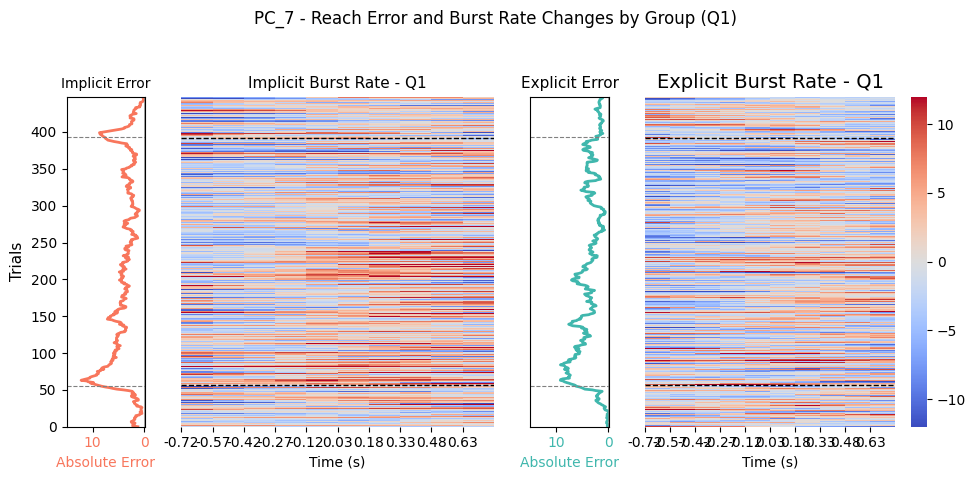

In [48]:
def plot_combined_figure(quartile_idx=0, implicit_error_smooth=None, explicit_error_smooth=None):
    """Create a combined figure with both error plots and heatmaps."""
    
    # Check if error data was provided, exit if not
    if implicit_error_smooth is None or explicit_error_smooth is None:
        print("Error: Missing error data. Both implicit_error_smooth and explicit_error_smooth must be provided.")
        return None
    
    # Create figure with 4 subplots in a row
    fig, axes = plt.subplots(1, 4, figsize=(10, 5), gridspec_kw={'width_ratios': [0.5, 2, 0.5, 2]})
    fig.subplots_adjust(wspace=0.4)
    
    # Define skip trials consistently across all plots
    skip_trials = 0
    
    # Define implicit and explicit trial indexes for error plots
    # Apply skip_trials to ensure consistency
    implicit_trial_idx = np.arange(skip_trials, len(implicit_error_smooth))
    explicit_trial_idx = np.arange(skip_trials, len(explicit_error_smooth))
    
    # Use the skipped trial indices for plotting
    implicit_error_for_plot = implicit_error_smooth[skip_trials:]
    explicit_error_for_plot = explicit_error_smooth[skip_trials:]
    
    #=========================#
    # 1. Implicit Error Plot  #
    #=========================#
    ax_implicit_error = axes[0]
    
    # Plot Implicit Group Error - now using the skipped data
    ax_implicit_error.plot(implicit_error_for_plot-2.5, implicit_trial_idx, '-', 
                color=implicit_palette[1], linewidth=2, label='Error')

    # Set the xlabel with color on the right side
    ax_implicit_error.set_xlabel('Absolute Error', color=implicit_palette[1], fontsize=10)
    ax_implicit_error.tick_params(axis='x', labelcolor=implicit_palette[1])
    ax_implicit_error.set_xlim(15, -0.1)

    # Add phase transition lines - adjusted for skipped trials
    ax_implicit_error.axhline(BASELINE_TRIALS - skip_trials, linestyle='--', color='gray', linewidth=0.8)
    ax_implicit_error.axhline(len(implicit_trial_idx) - (WASHOUT_TRIALS - skip_trials), linestyle='--', color='gray', linewidth=0.8)
    ax_implicit_error.axvline(0, linestyle='-', color='gray', linewidth=0.5)

    # Add title
    ax_implicit_error.set_title('Implicit Error', fontsize=10)
    
    # Add Y-axis labels
    ax_implicit_error.set_ylabel('Trials', fontsize=11)
    
    # Set y-limits to match across all plots
    max_trials = max(len(implicit_trial_idx), len(explicit_trial_idx))
    ax_implicit_error.set_ylim(0, max_trials)
    
    # Remove legend
    if ax_implicit_error.get_legend() is not None:
        ax_implicit_error.get_legend().remove()
    
    #=========================#
    # 2. Implicit Heatmap     #
    #=========================#
    ax_implicit_heatmap = axes[1]
    
    # Get data for implicit heatmap
    implicit_heatmap_data = collect_time_series_data(quartile_idx, "Implicit")
    
    if implicit_heatmap_data is not None:
        # Baseline correction
        baseline_data = implicit_heatmap_data.iloc[:BASELINE_TRIALS, :]
        baseline_means = baseline_data.mean(axis=0)
        corrected_data = implicit_heatmap_data.subtract(baseline_means, axis=1)
        
        # Skip trials for plotting - using the same skip_trials value as in error plots
        corrected_data_for_plotting = corrected_data.iloc[skip_trials:, :]
        
        # Combine time bins - group every 3 columns (assuming each is 0.2s) to get 0.6s bins
        num_original_cols = len(corrected_data_for_plotting.columns)
        num_combined_cols = num_original_cols // 3
        combined_data = pd.DataFrame()
        combined_times = []
        
        for i in range(num_combined_cols):
            start_idx = i * 3
            end_idx = min((i+1) * 3, num_original_cols)
            # Get the time points we're combining
            time_points = corrected_data_for_plotting.columns[start_idx:end_idx]
            # Use the middle value as the new bin center
            if len(time_points) > 0:
                combined_times.append(np.mean(time_points))
                # Average the values across these 3 columns
                col_slice = corrected_data_for_plotting.iloc[:, start_idx:end_idx]
                combined_data[combined_times[-1]] = col_slice.mean(axis=1)
        
        # Replace the original data with the combined data
        corrected_data_for_plotting = combined_data
        
        # Create heatmap
        sns.heatmap(corrected_data_for_plotting, cmap="coolwarm", center=0, vmin=-12, vmax=12,
                   xticklabels=20, yticklabels=50,
                   ax=ax_implicit_heatmap)
        
        # CHANGE: Don't invert y-axis to show trial 1 at the bottom
        # Original line: ax_implicit_heatmap.invert_yaxis()
        
        # Mark phase transitions - adjust positions to account for skipped trials
        ax_implicit_heatmap.axhline(BASELINE_TRIALS - skip_trials, color='black', linestyle='--', linewidth=1)
        ax_implicit_heatmap.axhline(corrected_data_for_plotting.shape[0] - (WASHOUT_TRIALS - skip_trials), 
                                  color='black', linestyle='--', linewidth=1)
        
        # Mark movement onset
        time_col_indices = [i for i, col in enumerate(corrected_data_for_plotting.columns) if abs(col) < bin_size/2]
        if time_col_indices:
            zero_idx = time_col_indices[0]
            ax_implicit_heatmap.axvline(zero_idx, color='black', linestyle='-', linewidth=1)
        
        # Format x-axis to show actual time values (using combined bin values)
        num_xticks = min(10, len(corrected_data_for_plotting.columns))
        tick_indices = np.linspace(0, len(corrected_data_for_plotting.columns) - 1, num_xticks, dtype=int)
        # Use the column names directly since they now represent the combined bin centers
        tick_times = [round(corrected_data_for_plotting.columns[i], 2) for i in tick_indices]
        ax_implicit_heatmap.set_xticks(tick_indices)
        ax_implicit_heatmap.set_xticklabels(tick_times)
        
        # Set title
        ax_implicit_heatmap.set_title(f"Implicit Burst Rate - Q{quartile_idx+1}", fontsize=11)
        ax_implicit_heatmap.set_xlabel("Time (s)", fontsize=10)
        
        # Remove the colorbar
        cbar = ax_implicit_heatmap.collections[0].colorbar
        cbar.remove()
        
        # Remove y-axis labels - consistent with explicit heatmap
        ax_implicit_heatmap.set_ylabel('')
        
        # remove the y-ticks and labels
        ax_implicit_heatmap.set_yticks([])
        
        
        # CHANGE: Reverse the y-limits to match the error plot dimensions properly
        # Original line: ax_implicit_heatmap.set_ylim(corrected_data_for_plotting.shape[0], 0)
        ax_implicit_heatmap.set_ylim(0, corrected_data_for_plotting.shape[0])
    else:
        ax_implicit_heatmap.text(0.5, 0.5, f"No data available for Implicit Q{quartile_idx+1}", 
                               ha='center', va='center', fontsize=11)
        
    #=========================#
    # 3. Explicit Error Plot  #
    #=========================#
    ax_explicit_error = axes[2]
    
    # Plot Explicit Group Error - using the skipped data
    ax_explicit_error.plot(explicit_error_for_plot-2.5, explicit_trial_idx, '-', 
                color=explicit_palette[1], linewidth=2, label='Error')
    ax_explicit_error.set_xlabel('Absolute Error', color=explicit_palette[1], fontsize=10)
    ax_explicit_error.tick_params(axis='x', labelcolor=explicit_palette[1])
    ax_explicit_error.set_xlim(15, -0.1)

    # Add phase transition lines - adjusted for skipped trials
    ax_explicit_error.axhline(BASELINE_TRIALS - skip_trials, linestyle='--', color='gray', linewidth=0.8)
    ax_explicit_error.axhline(len(explicit_trial_idx) - (WASHOUT_TRIALS - skip_trials), linestyle='--', color='gray', linewidth=0.8)
    ax_explicit_error.axvline(0, linestyle='-', color='gray', linewidth=0.5)

    # Add title
    ax_explicit_error.set_title('Explicit Error', fontsize=11)
    
    # Set same y-limits as implicit error plot
    ax_explicit_error.set_ylim(0, max_trials)
    
    # Remove all ticks and labels
    ax_explicit_error.set_yticks([])
    ax_explicit_error.set_ylabel('')
    
    # Remove legend if it exists
    if ax_explicit_error.get_legend() is not None:
        ax_explicit_error.get_legend().remove()
    
    #=========================#
    # 4. Explicit Heatmap     #
    #=========================#
    ax_explicit_heatmap = axes[3]
    
    # Get data for explicit heatmap
    explicit_heatmap_data = collect_time_series_data(quartile_idx, "Explicit")
    
    if explicit_heatmap_data is not None:
        # Baseline correction
        baseline_data = explicit_heatmap_data.iloc[:BASELINE_TRIALS, :]
        baseline_means = baseline_data.mean(axis=0)
        corrected_data = explicit_heatmap_data.subtract(baseline_means, axis=1)
        
        # Skip the same number of trials for plotting
        corrected_data_for_plotting = corrected_data.iloc[skip_trials:, :]
        
        # Combine time bins - group every 3 columns (assuming each is 0.2s) to get 0.6s bins
        num_original_cols = len(corrected_data_for_plotting.columns)
        num_combined_cols = num_original_cols // 3
        combined_data = pd.DataFrame()
        combined_times = []
        
        for i in range(num_combined_cols):
            start_idx = i * 3
            end_idx = min((i+1) * 3, num_original_cols)
            # Get the time points we're combining
            time_points = corrected_data_for_plotting.columns[start_idx:end_idx]
            # Use the middle value as the new bin center
            if len(time_points) > 0:
                combined_times.append(np.mean(time_points))
                # Average the values across these 3 columns
                col_slice = corrected_data_for_plotting.iloc[:, start_idx:end_idx]
                combined_data[combined_times[-1]] = col_slice.mean(axis=1)
        
        # Replace the original data with the combined data
        corrected_data_for_plotting = combined_data
        
        # Create heatmap
        sns.heatmap(corrected_data_for_plotting, cmap="coolwarm", center=0, vmin=-12, vmax=12,
                   xticklabels=20, yticklabels=False,
                   ax=ax_explicit_heatmap)
        
        # CHANGE: Don't invert y-axis
        # Original line: ax_explicit_heatmap.invert_yaxis()
        
        # Mark phase transitions - adjust positions to account for skipped trials
        ax_explicit_heatmap.axhline(BASELINE_TRIALS - skip_trials, color='black', linestyle='--', linewidth=1)
        ax_explicit_heatmap.axhline(corrected_data_for_plotting.shape[0] - (WASHOUT_TRIALS - skip_trials), 
                                  color='black', linestyle='--', linewidth=1)
        
        # Mark movement onset
        time_col_indices = [i for i, col in enumerate(corrected_data_for_plotting.columns) if abs(col) < bin_size/2]
        if time_col_indices:
            zero_idx = time_col_indices[0]
            ax_explicit_heatmap.axvline(zero_idx, color='black', linestyle='-', linewidth=1)
        
        # Format x-axis to show actual time values
        ax_explicit_heatmap.set_xticks(tick_indices)
        ax_explicit_heatmap.set_xticklabels(tick_times)
        
        # Set title
        ax_explicit_heatmap.set_title(f"Explicit Burst Rate - Q{quartile_idx+1}", fontsize=14)
        ax_explicit_heatmap.set_xlabel("Time (s)", fontsize=10)
        
        # Remove y ticks and labels
        ax_explicit_heatmap.set_ylabel('')
        
        # CHANGE: Reverse the y-limits to match the error plot dimensions properly
        # Original line: ax_explicit_heatmap.set_ylim(corrected_data_for_plotting.shape[0], 0)
        ax_explicit_heatmap.set_ylim(0, corrected_data_for_plotting.shape[0])
    else:
        ax_explicit_heatmap.text(0.5, 0.5, f"No data available for Explicit Q{quartile_idx+1}", 
                               ha='center', va='center', fontsize=12)
    
    # Main title
    plt.suptitle(f"{pc_key} - Reach Error and Burst Rate Changes by Group (Q{quartile_idx+1})", fontsize=12)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    
    return fig

# Use the actual error data from the original code
# This assumes these variables are defined elsewhere in your code
# If they aren't already defined, you'll need to load them from your data files

# Run to create the figure
if __name__ == "__main__":
    # Load your actual error data if it's not already in the environment
    # For example:
    # implicit_error_data = pd.read_csv('implicit_error_data.csv')
    # explicit_error_data = pd.read_csv('explicit_error_data.csv')
    # implicit_error_smooth = implicit_error_data['error_smooth'].values
    # explicit_error_smooth = explicit_error_data['error_smooth'].values
    
    # Create figure with quartile 0, passing the actual error data
    fig = plot_combined_figure(quartile_idx=0, 
                              implicit_error_smooth=implicit_error_smooth, 
                              explicit_error_smooth=explicit_error_smooth)
    
    if fig is not None:
        plt.show()
        # Uncomment to save
        # fig.savefig(f"{pc_key}_Q1_combined_error_and_burst.png", dpi=300, bbox_inches='tight')

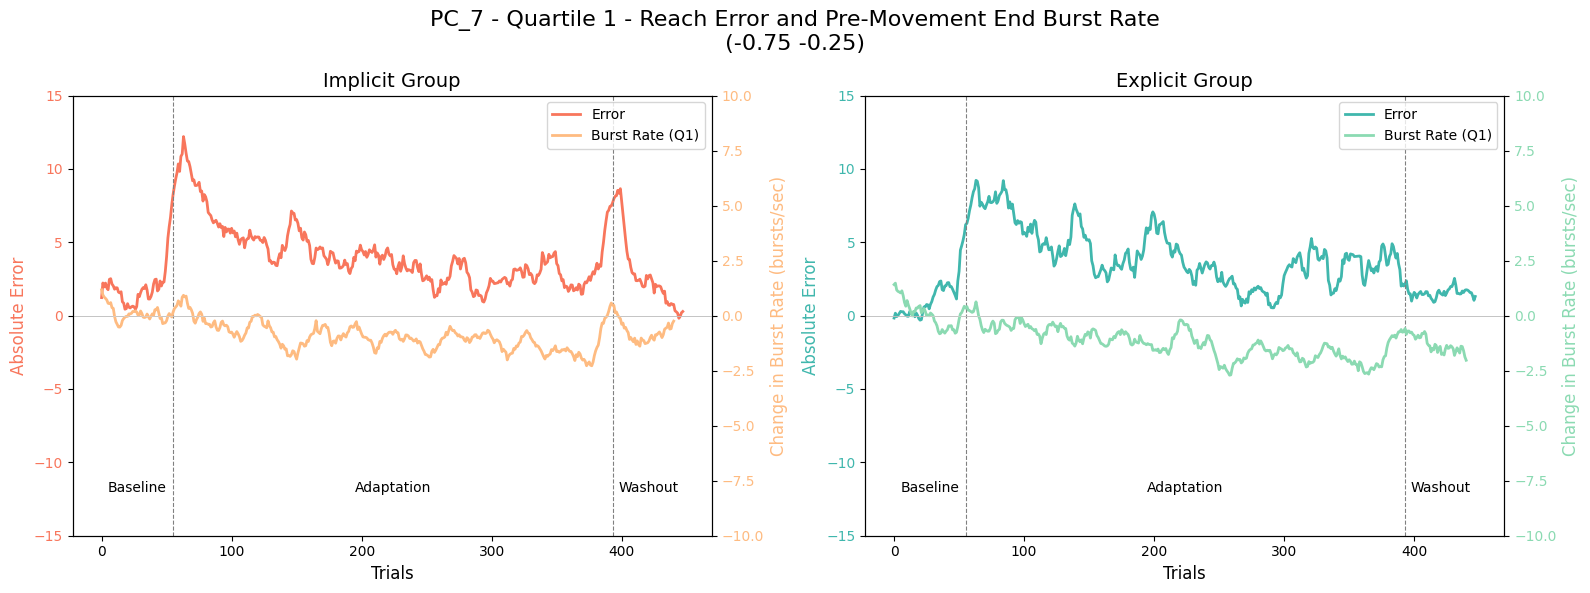

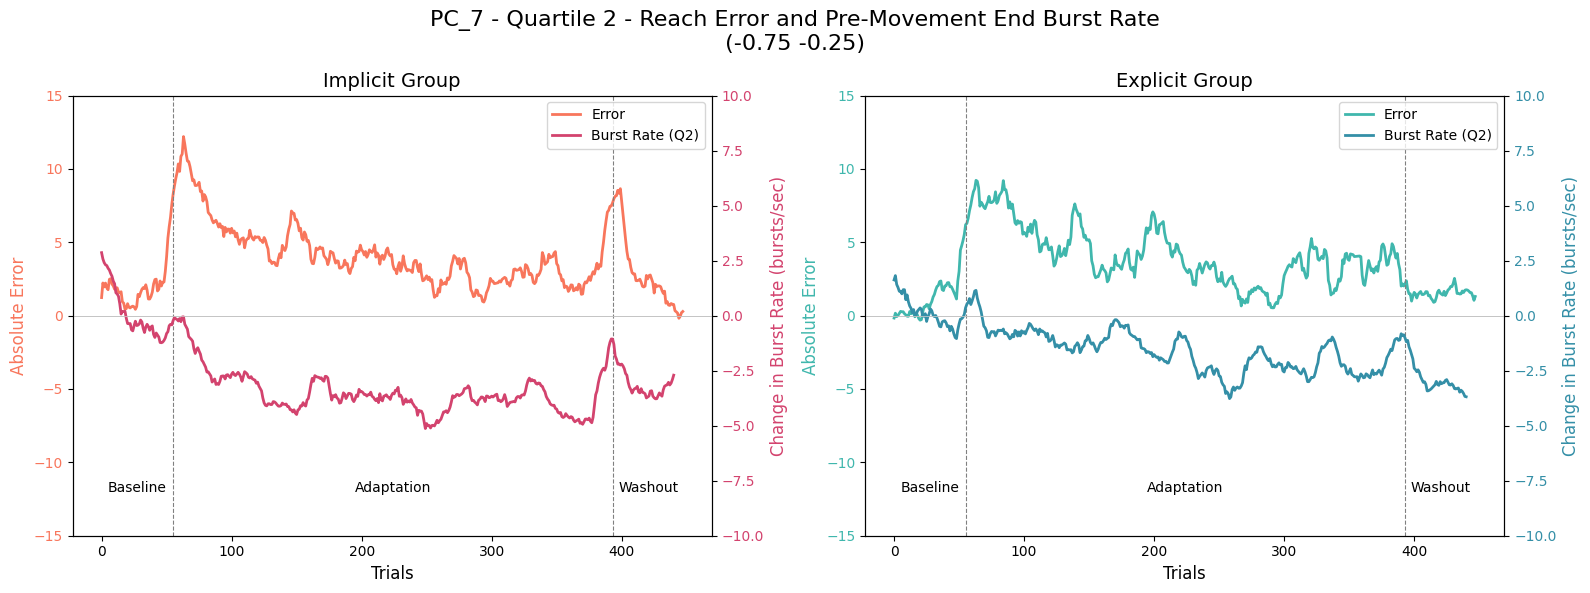

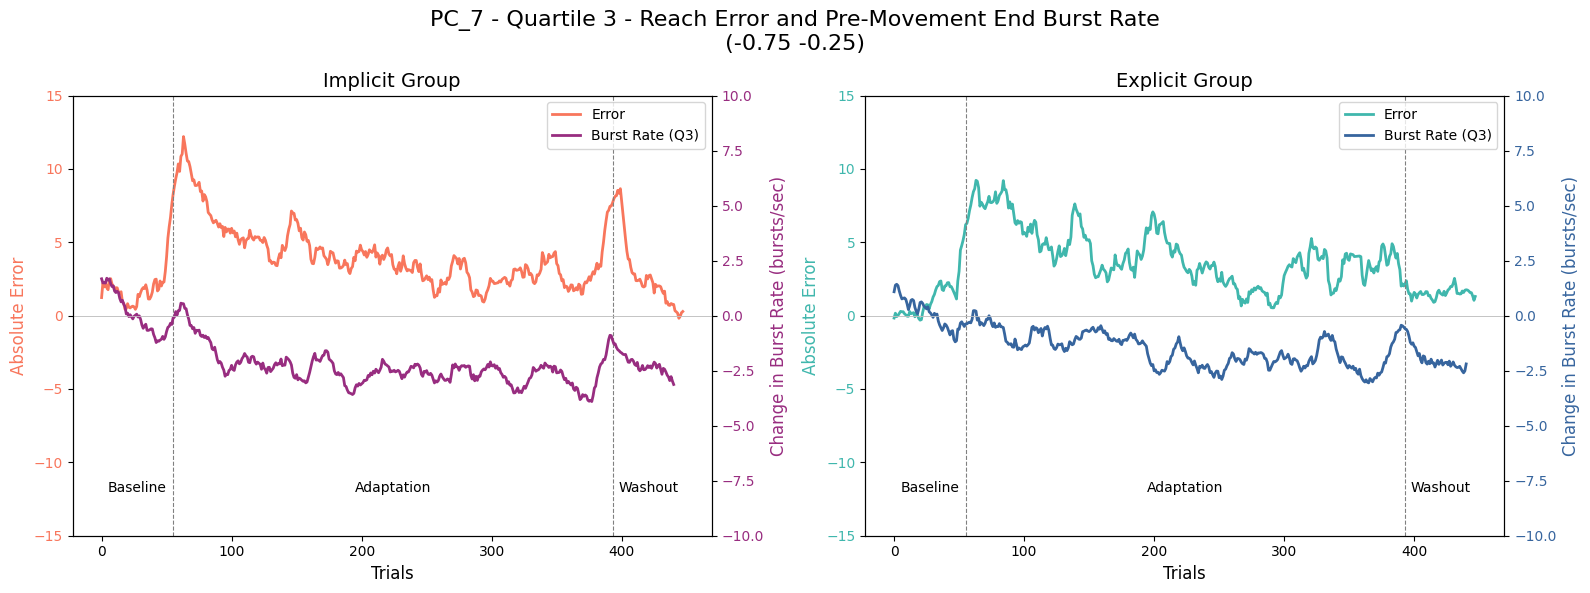

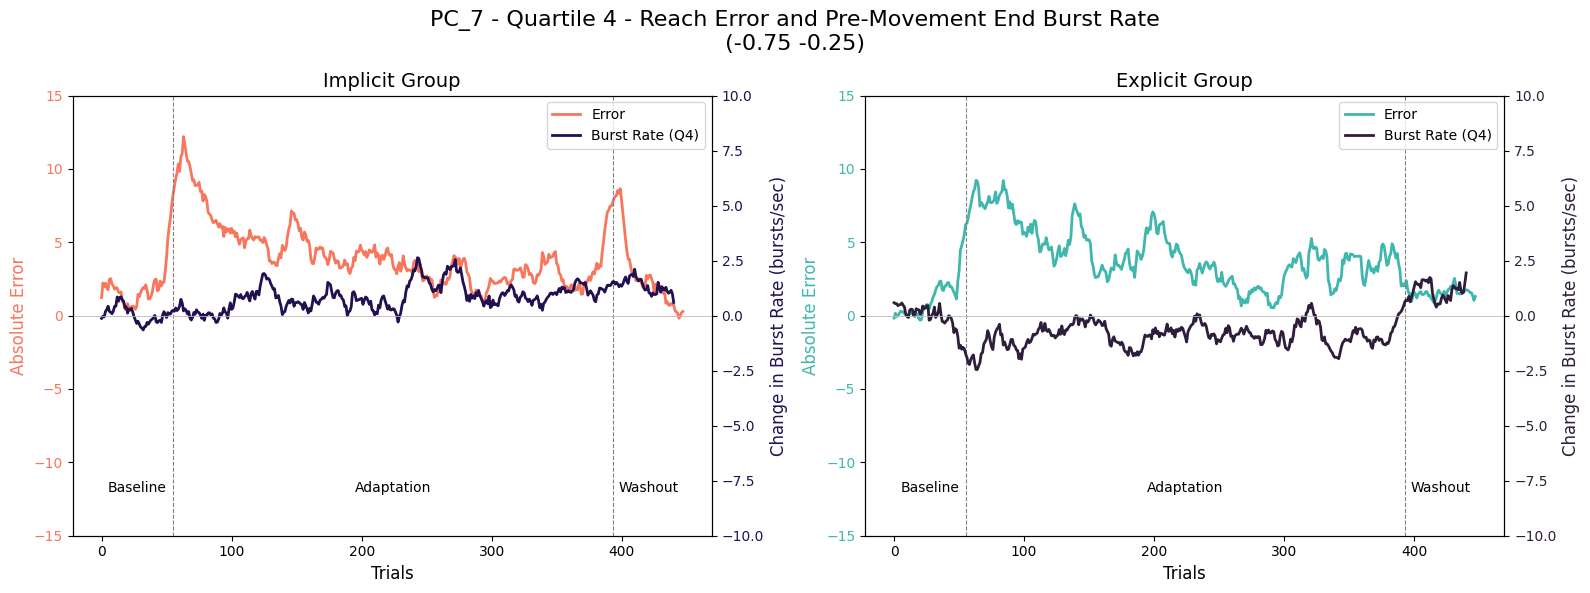

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Moving average function
def moving_average(data, window_size=10):
    """Apply a moving average to smooth data."""
    if window_size % 2 == 0:
        window_size += 1
    
    half_window = window_size // 2
    smoothed_data = []
    
    for i in range(len(data)):
        window_start = max(0, i - half_window)
        window_end = min(len(data), i + half_window + 1)
        window_values = data[window_start:window_end]
        smoothed_data.append(np.mean(window_values))
    
    return np.array(smoothed_data)

# Parameters
pc_key = "PC_7"
time_window_start = -0.75
time_window_end = -0.25
BASELINE_TRIALS = 55
WASHOUT_TRIALS = 55
window_size = 15

# Setup color palettes
implicit_palette = sns.color_palette("magma_r", 6)
explicit_palette = sns.color_palette("mako_r", 6)
implicit_colors = [implicit_palette[i] for i in [0, 2, 3, 5]]
explicit_colors = [explicit_palette[i] for i in [0, 2, 3, 5]]

# Format window values for file naming
formatted_start = f"{time_window_start:.3f}".rstrip('0').rstrip('.')
formatted_end = f"{time_window_end:.3f}".rstrip('0').rstrip('.')
if formatted_start == '-0': formatted_start = '0'
if formatted_end == '-0': formatted_end = '0'

# Load behavioral data (as provided in your code)
explicit_behav = pd.read_csv(r'C:\Users\qmoreau\Documents\Work\Beta_bursts\Bursts\Behavioral derivatives\behav_df_explicit_trial.csv')
implicit_behav = pd.read_csv(r'C:\Users\qmoreau\Documents\Work\Beta_bursts\Bursts\Behavioral derivatives\behav_df_implicit_trial.csv')

# Implicit group error data
implicit_error_values = np.abs(implicit_behav["reach_vis_err_corrected"].values)
implicit_trial_idx = implicit_behav["trial_idx"].values

# Explicit group error data
explicit_error_values = np.abs(explicit_behav["reach_vis_abs_err_corrected"].values)
explicit_trial_idx = explicit_behav["trial_idx"].values

# Calculate smoothed error values
implicit_error_smooth = moving_average(implicit_error_values, window_size)
explicit_error_smooth = moving_average(explicit_error_values, window_size)

# Load quartile data
def load_quartile_data(quartile_idx):
    filename = f'{pc_key}_Q{quartile_idx+1}_burst_rate_{formatted_start}_to_{formatted_end}.csv'
    try:
        return pd.read_csv(filename)
    except FileNotFoundError:
        print(f"Warning: File {filename} not found. Using empty DataFrame instead.")
        return pd.DataFrame()

# Generate plots for each quartile
for quartile_idx in range(4):
    # Load data for this quartile
    quartile_data = load_quartile_data(quartile_idx)
    
    if quartile_data.empty:
        print(f"No data available for Quartile {quartile_idx+1}, skipping plot.")
        continue
    
    # Separate by group
    implicit_qt_data = quartile_data[quartile_data['group'] == 'Implicit']
    explicit_qt_data = quartile_data[quartile_data['group'] == 'Explicit']
    
    # Create figure with two panels for this quartile
    fig, (ax_implicit, ax_explicit) = plt.subplots(1, 2, figsize=(16, 6), sharex=True)
    fig.subplots_adjust(wspace=0.3)
    
    # Process and plot implicit group
    if not implicit_qt_data.empty:
        # Calculate burst rate stats
        summary = implicit_qt_data.groupby('trial_idx')['burst_rate'].agg(['mean']).reset_index()
        summary = summary.sort_values('trial_idx')
        
        # Baseline correction - calculate baseline mean
        baseline_mean = summary.iloc[:BASELINE_TRIALS]['mean'].mean() if len(summary) >= BASELINE_TRIALS else summary['mean'].mean()
        
        # Apply baseline correction to the entire dataset
        summary['mean_corrected'] = summary['mean'] - baseline_mean
        
        # Apply smoothing to the baseline-corrected data
        summary['smoothed_mean'] = moving_average(summary['mean_corrected'].values, window_size)
        
        # Plot error on primary y-axis
        ax_implicit.plot(implicit_trial_idx, implicit_error_smooth-2.5, '-', 
                        color=implicit_palette[1], linewidth=2, label='Error')
        ax_implicit.set_ylabel('Absolute Error', color=implicit_palette[1], fontsize=12)
        ax_implicit.tick_params(axis='y', labelcolor=implicit_palette[1])
        ax_implicit.set_ylim(-15, 15)
        
        # Create twin axis for burst rate
        ax_implicit_twin = ax_implicit.twinx()
        
        # Plot burst rate using the smoothed and baseline-corrected data
        ax_implicit_twin.plot(summary['trial_idx'], summary['smoothed_mean'], '-',
                             color=implicit_colors[quartile_idx], linewidth=2, 
                             label=f'Burst Rate (Q{quartile_idx+1})')
        
        ax_implicit_twin.set_ylabel('Change in Burst Rate (bursts/sec)', 
                                   color=implicit_colors[quartile_idx], fontsize=12)
        ax_implicit_twin.tick_params(axis='y', labelcolor=implicit_colors[quartile_idx])
        
        # Set fixed y-axis limits for burst rate
        ax_implicit_twin.set_ylim(-10, 10)
        
        # Add phase transition lines
        ax_implicit.axvline(BASELINE_TRIALS, linestyle='--', color='gray', linewidth=0.8)
        ax_implicit.axvline(len(implicit_trial_idx) - WASHOUT_TRIALS, linestyle='--', color='gray', linewidth=0.8)
        ax_implicit.axhline(0, linestyle='-', color='gray', linewidth=0.5)
        ax_implicit_twin.axhline(0, linestyle='-', color='lightgray', linewidth=0.5)
        
        # Create combined legend
        lines_impl, labels_impl = ax_implicit.get_legend_handles_labels()
        lines_impl_twin, labels_impl_twin = ax_implicit_twin.get_legend_handles_labels()
        ax_implicit.legend(lines_impl + lines_impl_twin, 
                          labels_impl + labels_impl_twin, 
                          loc='upper right', fontsize=10)
    else:
        ax_implicit.text(0.5, 0.5, f"No data available for Implicit Group - Q{quartile_idx+1}", 
                        ha='center', va='center', transform=ax_implicit.transAxes)
    
    # Process and plot explicit group
    if not explicit_qt_data.empty:
        # Calculate burst rate stats
        summary = explicit_qt_data.groupby('trial_idx')['burst_rate'].agg(['mean']).reset_index()
        summary = summary.sort_values('trial_idx')
        
        # Baseline correction - calculate baseline mean
        baseline_mean = summary.iloc[:BASELINE_TRIALS]['mean'].mean() if len(summary) >= BASELINE_TRIALS else summary['mean'].mean()
        
        # Apply baseline correction to the entire dataset
        summary['mean_corrected'] = summary['mean'] - baseline_mean
        
        # Apply smoothing to the baseline-corrected data
        summary['smoothed_mean'] = moving_average(summary['mean_corrected'].values, window_size)
        
        # Plot error on primary y-axis
        ax_explicit.plot(explicit_trial_idx, explicit_error_smooth-2.5, '-', 
                        color=explicit_palette[1], linewidth=2, label='Error')
        ax_explicit.set_ylabel('Absolute Error', color=explicit_palette[1], fontsize=12)
        ax_explicit.tick_params(axis='y', labelcolor=explicit_palette[1])
        ax_explicit.set_ylim(-15, 15)
        
        # Create twin axis for burst rate
        ax_explicit_twin = ax_explicit.twinx()
        
        # Plot burst rate using the smoothed and baseline-corrected data
        ax_explicit_twin.plot(summary['trial_idx'], summary['smoothed_mean'], '-',
                             color=explicit_colors[quartile_idx], linewidth=2, 
                             label=f'Burst Rate (Q{quartile_idx+1})')
        
        ax_explicit_twin.set_ylabel('Change in Burst Rate (bursts/sec)', 
                                   color=explicit_colors[quartile_idx], fontsize=12)
        ax_explicit_twin.tick_params(axis='y', labelcolor=explicit_colors[quartile_idx])
        
        # Set fixed y-axis limits for burst rate
        ax_explicit_twin.set_ylim(-10, 10)
        
        # Add phase transition lines
        ax_explicit.axvline(BASELINE_TRIALS, linestyle='--', color='gray', linewidth=0.8)
        ax_explicit.axvline(len(explicit_trial_idx) - WASHOUT_TRIALS, linestyle='--', color='gray', linewidth=0.8)
        ax_explicit.axhline(0, linestyle='-', color='gray', linewidth=0.5)
        ax_explicit_twin.axhline(0, linestyle='-', color='lightgray', linewidth=0.5)
        
        # Create combined legend
        lines_expl, labels_expl = ax_explicit.get_legend_handles_labels()
        lines_expl_twin, labels_expl_twin = ax_explicit_twin.get_legend_handles_labels()
        ax_explicit.legend(lines_expl + lines_expl_twin, 
                          labels_expl + labels_expl_twin, 
                          loc='upper right', fontsize=10)
    else:
        ax_explicit.text(0.5, 0.5, f"No data available for Explicit Group - Q{quartile_idx+1}", 
                        ha='center', va='center', transform=ax_explicit.transAxes)
    
    # Add titles
    ax_implicit.set_title('Implicit Group', fontsize=14)
    ax_explicit.set_title('Explicit Group', fontsize=14)
    
    # Add X-axis labels
    ax_implicit.set_xlabel('Trials', fontsize=12)
    ax_explicit.set_xlabel('Trials', fontsize=12)
    
    # Add phase labels
    baseline_midpoint = BASELINE_TRIALS / 2
    adapt_midpoint = BASELINE_TRIALS + (len(implicit_trial_idx) - WASHOUT_TRIALS - BASELINE_TRIALS) / 2
    washout_midpoint = len(implicit_trial_idx) - WASHOUT_TRIALS + WASHOUT_TRIALS / 2
    
    ax_implicit.text(baseline_midpoint, -12, "Baseline", fontsize=10, ha='center')
    ax_implicit.text(adapt_midpoint, -12, "Adaptation", fontsize=10, ha='center')
    ax_implicit.text(washout_midpoint, -12, "Washout", fontsize=10, ha='center')
    
    ax_explicit.text(baseline_midpoint, -12, "Baseline", fontsize=10, ha='center')
    ax_explicit.text(adapt_midpoint, -12, "Adaptation", fontsize=10, ha='center')
    ax_explicit.text(washout_midpoint, -12, "Washout", fontsize=10, ha='center')
    
    # Main title
    plt.suptitle(f'{pc_key} - Quartile {quartile_idx+1} - Reach Error and Pre-Movement End Burst Rate\n ({time_window_start} {time_window_end}) ', fontsize=16)
    plt.tight_layout()

    plt.show()

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Moving average function
def moving_average(data, window_size=10):
    """Apply a moving average to smooth data."""
    if window_size % 2 == 0:
        window_size += 1
    
    half_window = window_size // 2
    smoothed_data = []
    
    for i in range(len(data)):
        window_start = max(0, i - half_window)
        window_end = min(len(data), i + half_window + 1)
        window_values = data[window_start:window_end]
        smoothed_data.append(np.mean(window_values))
    
    return np.array(smoothed_data)

# Parameters
pc_key = "PC_7"
time_window_start = 0.25
time_window_end = 0.75
BASELINE_TRIALS = 55
WASHOUT_TRIALS = 55
window_size = 15

# Setup color palettes
implicit_palette = sns.color_palette("magma_r", 6)
explicit_palette = sns.color_palette("mako_r", 6)
implicit_colors = [implicit_palette[i] for i in [0, 2, 3, 5]]
explicit_colors = [explicit_palette[i] for i in [0, 2, 3, 5]]

# Format window values for file naming
formatted_start = f"{time_window_start:.3f}".rstrip('0').rstrip('.')
formatted_end = f"{time_window_end:.3f}".rstrip('0').rstrip('.')
if formatted_start == '-0': formatted_start = '0'
if formatted_end == '-0': formatted_end = '0'

# Load behavioral data (as provided in your code)
explicit_behav = pd.read_csv(r'C:\Users\qmoreau\Documents\Work\Beta_bursts\Bursts\Behavioral derivatives\behav_df_explicit_trial.csv')
implicit_behav = pd.read_csv(r'C:\Users\qmoreau\Documents\Work\Beta_bursts\Bursts\Behavioral derivatives\behav_df_implicit_trial.csv')

# Implicit group error data
implicit_error_values = np.abs(implicit_behav["reach_vis_err_corrected"].values)
implicit_trial_idx = implicit_behav["trial_idx"].values

# Explicit group error data
explicit_error_values = np.abs(explicit_behav["reach_vis_abs_err_corrected"].values)
explicit_trial_idx = explicit_behav["trial_idx"].values

# Calculate smoothed error values
implicit_error_smooth = moving_average(implicit_error_values, window_size)
explicit_error_smooth = moving_average(explicit_error_values, window_size)

# Load quartile data
def load_quartile_data(quartile_idx):
    filename = f'{pc_key}_Q{quartile_idx+1}_burst_rate_{formatted_start}_to_{formatted_end}.csv'
    try:
        return pd.read_csv(filename)
    except FileNotFoundError:
        print(f"Warning: File {filename} not found. Using empty DataFrame instead.")
        return pd.DataFrame()

# Generate plots for each quartile
for quartile_idx in range(4):
    # Load data for this quartile
    quartile_data = load_quartile_data(quartile_idx)
    
    if quartile_data.empty:
        print(f"No data available for Quartile {quartile_idx+1}, skipping plot.")
        continue
    
    # Separate by group
    implicit_qt_data = quartile_data[quartile_data['group'] == 'Implicit']
    explicit_qt_data = quartile_data[quartile_data['group'] == 'Explicit']
    
    # Create figure with two panels for this quartile
    fig, (ax_implicit, ax_explicit) = plt.subplots(1, 2, figsize=(16, 6), sharex=True)
    fig.subplots_adjust(wspace=0.3)
    
    # Process and plot implicit group
    if not implicit_qt_data.empty:
        # Calculate burst rate stats
        summary = implicit_qt_data.groupby('trial_idx')['burst_rate'].agg(['mean']).reset_index()
        summary = summary.sort_values('trial_idx')
        
        # Baseline correction - calculate baseline mean
        baseline_mean = summary.iloc[:BASELINE_TRIALS]['mean'].mean() if len(summary) >= BASELINE_TRIALS else summary['mean'].mean()
        
        # Apply baseline correction to the entire dataset
        summary['mean_corrected'] = summary['mean'] - baseline_mean
        
        # Apply smoothing to the baseline-corrected data
        summary['smoothed_mean'] = moving_average(summary['mean_corrected'].values, window_size)
        
        # Plot error on primary y-axis
        ax_implicit.plot(implicit_trial_idx, implicit_error_smooth-2.5, '-', 
                        color=implicit_palette[1], linewidth=2, label='Error')
        ax_implicit.set_ylabel('Absolute Error', color=implicit_palette[1], fontsize=12)
        ax_implicit.tick_params(axis='y', labelcolor=implicit_palette[1])
        ax_implicit.set_ylim(-15, 15)
        
        # Create twin axis for burst rate
        ax_implicit_twin = ax_implicit.twinx()
        
        # Plot burst rate using the smoothed and baseline-corrected data
        ax_implicit_twin.plot(summary['trial_idx'], summary['smoothed_mean'], '-',
                             color=implicit_colors[quartile_idx], linewidth=2, 
                             label=f'Burst Rate (Q{quartile_idx+1})')
        
        ax_implicit_twin.set_ylabel('Change in Burst Rate (bursts/sec)', 
                                   color=implicit_colors[quartile_idx], fontsize=12)
        ax_implicit_twin.tick_params(axis='y', labelcolor=implicit_colors[quartile_idx])
        
        # Set fixed y-axis limits for burst rate
        ax_implicit_twin.set_ylim(-10, 10)
        
        # Add phase transition lines
        ax_implicit.axvline(BASELINE_TRIALS, linestyle='--', color='gray', linewidth=0.8)
        ax_implicit.axvline(len(implicit_trial_idx) - WASHOUT_TRIALS, linestyle='--', color='gray', linewidth=0.8)
        ax_implicit.axhline(0, linestyle='-', color='gray', linewidth=0.5)
        ax_implicit_twin.axhline(0, linestyle='-', color='lightgray', linewidth=0.5)
        
        # Create combined legend
        lines_impl, labels_impl = ax_implicit.get_legend_handles_labels()
        lines_impl_twin, labels_impl_twin = ax_implicit_twin.get_legend_handles_labels()
        ax_implicit.legend(lines_impl + lines_impl_twin, 
                          labels_impl + labels_impl_twin, 
                          loc='upper right', fontsize=10)
    else:
        ax_implicit.text(0.5, 0.5, f"No data available for Implicit Group - Q{quartile_idx+1}", 
                        ha='center', va='center', transform=ax_implicit.transAxes)
    
    # Process and plot explicit group
    if not explicit_qt_data.empty:
        # Calculate burst rate stats
        summary = explicit_qt_data.groupby('trial_idx')['burst_rate'].agg(['mean']).reset_index()
        summary = summary.sort_values('trial_idx')
        
        # Baseline correction - calculate baseline mean
        baseline_mean = summary.iloc[:BASELINE_TRIALS]['mean'].mean() if len(summary) >= BASELINE_TRIALS else summary['mean'].mean()
        
        # Apply baseline correction to the entire dataset
        summary['mean_corrected'] = summary['mean'] - baseline_mean
        
        # Apply smoothing to the baseline-corrected data
        summary['smoothed_mean'] = moving_average(summary['mean_corrected'].values, window_size)
        
        # Plot error on primary y-axis
        ax_explicit.plot(explicit_trial_idx, explicit_error_smooth-2.5, '-', 
                        color=explicit_palette[1], linewidth=2, label='Error')
        ax_explicit.set_ylabel('Absolute Error', color=explicit_palette[1], fontsize=12)
        ax_explicit.tick_params(axis='y', labelcolor=explicit_palette[1])
        ax_explicit.set_ylim(-15, 15)
        
        # Create twin axis for burst rate
        ax_explicit_twin = ax_explicit.twinx()
        
        # Plot burst rate using the smoothed and baseline-corrected data
        ax_explicit_twin.plot(summary['trial_idx'], summary['smoothed_mean'], '-',
                             color=explicit_colors[quartile_idx], linewidth=2, 
                             label=f'Burst Rate (Q{quartile_idx+1})')
        
        ax_explicit_twin.set_ylabel('Change in Burst Rate (bursts/sec)', 
                                   color=explicit_colors[quartile_idx], fontsize=12)
        ax_explicit_twin.tick_params(axis='y', labelcolor=explicit_colors[quartile_idx])
        
        # Set fixed y-axis limits for burst rate
        ax_explicit_twin.set_ylim(-10, 10)
        
        # Add phase transition lines
        ax_explicit.axvline(BASELINE_TRIALS, linestyle='--', color='gray', linewidth=0.8)
        ax_explicit.axvline(len(explicit_trial_idx) - WASHOUT_TRIALS, linestyle='--', color='gray', linewidth=0.8)
        ax_explicit.axhline(0, linestyle='-', color='gray', linewidth=0.5)
        ax_explicit_twin.axhline(0, linestyle='-', color='lightgray', linewidth=0.5)
        
        # Create combined legend
        lines_expl, labels_expl = ax_explicit.get_legend_handles_labels()
        lines_expl_twin, labels_expl_twin = ax_explicit_twin.get_legend_handles_labels()
        ax_explicit.legend(lines_expl + lines_expl_twin, 
                          labels_expl + labels_expl_twin, 
                          loc='upper right', fontsize=10)
    else:
        ax_explicit.text(0.5, 0.5, f"No data available for Explicit Group - Q{quartile_idx+1}", 
                        ha='center', va='center', transform=ax_explicit.transAxes)
    
    # Add titles
    ax_implicit.set_title('Implicit Group', fontsize=14)
    ax_explicit.set_title('Explicit Group', fontsize=14)
    
    # Add X-axis labels
    ax_implicit.set_xlabel('Trials', fontsize=12)
    ax_explicit.set_xlabel('Trials', fontsize=12)
    
    # Add phase labels
    baseline_midpoint = BASELINE_TRIALS / 2
    adapt_midpoint = BASELINE_TRIALS + (len(implicit_trial_idx) - WASHOUT_TRIALS - BASELINE_TRIALS) / 2
    washout_midpoint = len(implicit_trial_idx) - WASHOUT_TRIALS + WASHOUT_TRIALS / 2
    
    ax_implicit.text(baseline_midpoint, -12, "Baseline", fontsize=10, ha='center')
    ax_implicit.text(adapt_midpoint, -12, "Adaptation", fontsize=10, ha='center')
    ax_implicit.text(washout_midpoint, -12, "Washout", fontsize=10, ha='center')
    
    ax_explicit.text(baseline_midpoint, -12, "Baseline", fontsize=10, ha='center')
    ax_explicit.text(adapt_midpoint, -12, "Adaptation", fontsize=10, ha='center')
    ax_explicit.text(washout_midpoint, -12, "Washout", fontsize=10, ha='center')
    
    # Main title
    plt.suptitle(f'{pc_key} - Quartile {quartile_idx+1} - Reach Error and Post-Movement End Burst Rate\n ({time_window_start} {time_window_end}) ', fontsize=16)
    plt.tight_layout()

    plt.show()

No data available for Quartile 1, skipping plot.
No data available for Quartile 2, skipping plot.
No data available for Quartile 3, skipping plot.
No data available for Quartile 4, skipping plot.


In [51]:
implicit_behav.keys()

Index(['Unnamed: 0', 'block', 'trial', 'trial_coherence', 'trial_perturb',
       'trial_type', 'reach_dur', 'reach_rt', 'trial_directions',
       'trial_target', 'aim_target', 'reach_target', 'aim_real_angle',
       'reach_real_angle', 'true_target_angle', 'perturb_cat',
       'reach_vis_angle', 'reach_vis_err', 'reach_vis_abs_err',
       'aim_vis_angle', 'aim_vis_err', 'aim_vis_abs_err',
       'reach_vis_err_corrected', 'trial_idx'],
      dtype='object')

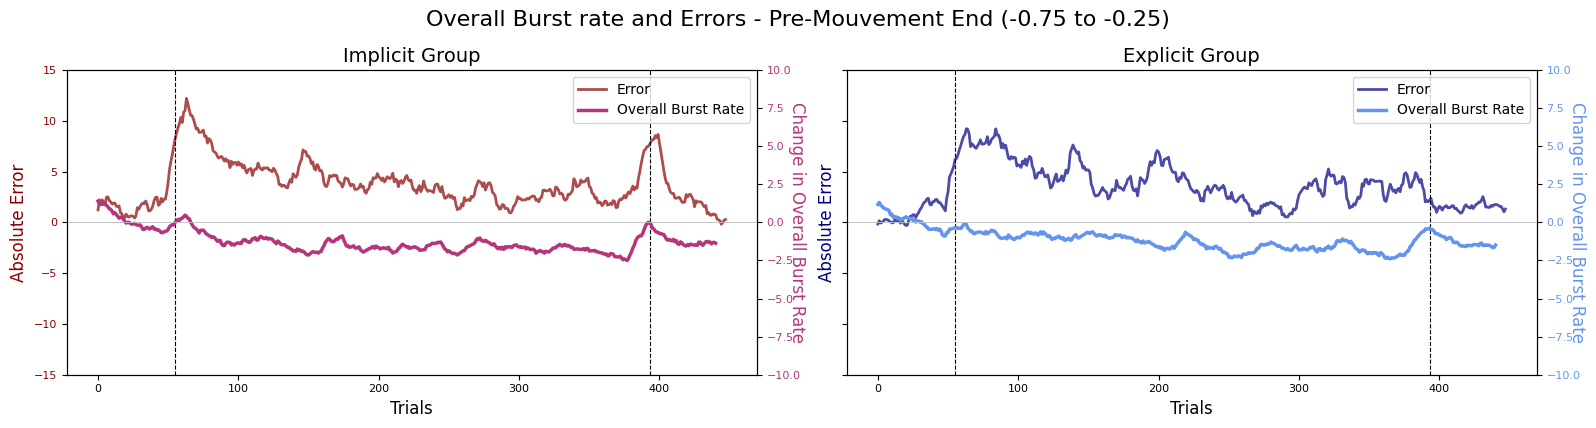

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Moving average function
def moving_average(data, window_size=10):
    """Apply a moving average to smooth data."""
    if window_size % 2 == 0:
        window_size += 1
    
    half_window = window_size // 2
    smoothed_data = []
    
    for i in range(len(data)):
        window_start = max(0, i - half_window)
        window_end = min(len(data), i + half_window + 1)
        window_values = data[window_start:window_end]
        smoothed_data.append(np.mean(window_values))
    
    return np.array(smoothed_data)

# Parameters
pc_key = "PC_7"
time_window_start = -0.75
time_window_end = -0.25
BASELINE_TRIALS = 55
WASHOUT_TRIALS = 55
window_size = 15

# Setup color palettes
implicit_color = sns.color_palette("magma_r", 1)[0]  # Burst rate color for implicit
explicit_color = 'cornflowerblue'                    # Lighter blue for explicit burst rate
implicit_error_color = 'darkred'                     # Error color for implicit
explicit_error_color = 'navy'                        # Error color for explicit

# Format window values for file naming
formatted_start = f"{time_window_start:.3f}".rstrip('0').rstrip('.')
formatted_end = f"{time_window_end:.3f}".rstrip('0').rstrip('.')
if formatted_start == '-0': formatted_start = '0'
if formatted_end == '-0': formatted_end = '0'

# Load behavioral data
explicit_behav = pd.read_csv(r'C:\Users\qmoreau\Documents\Work\Beta_bursts\Bursts\Behavioral derivatives\behav_df_explicit_trial.csv')
implicit_behav = pd.read_csv(r'C:\Users\qmoreau\Documents\Work\Beta_bursts\Bursts\Behavioral derivatives\behav_df_implicit_trial.csv')

# Implicit group error data
implicit_error_values = np.abs(implicit_behav["reach_vis_err_corrected"].values)
implicit_trial_idx = implicit_behav["trial_idx"].values

# Explicit group error data
explicit_error_values = np.abs(explicit_behav["reach_vis_abs_err_corrected"].values)
explicit_trial_idx = explicit_behav["trial_idx"].values

# Calculate smoothed error values
implicit_error_smooth = moving_average(implicit_error_values, window_size)
explicit_error_smooth = moving_average(explicit_error_values, window_size)

# Load and combine quartile data
combined_data = pd.DataFrame()
for quartile_idx in range(4):
    filename = f'{pc_key}_Q{quartile_idx+1}_burst_rate_{formatted_start}_to_{formatted_end}.csv'
    try:
        quartile_data = pd.read_csv(filename)
        combined_data = pd.concat([combined_data, quartile_data], ignore_index=True)
    except FileNotFoundError:
        print(f"Warning: File {filename} not found.")

# Create figure with 1 row, 2 columns
fig, axes = plt.subplots(1, 2, figsize=(16, 4), sharey=True)

# Separate by group
implicit_data = combined_data[combined_data['group'] == 'Implicit']
explicit_data = combined_data[combined_data['group'] == 'Explicit']

# Process implicit group (left column)
if not implicit_data.empty:
    ax_implicit = axes[0]
    
    # Group and smooth
    summary = implicit_data.groupby('trial_idx')['burst_rate'].mean().reset_index()
    summary = summary.sort_values('trial_idx')
    
    # Baseline correction
    baseline_mean = summary.iloc[:BASELINE_TRIALS]['burst_rate'].mean() if len(summary) >= BASELINE_TRIALS else summary['burst_rate'].mean()
    summary['corrected'] = summary['burst_rate'] - baseline_mean
    
    # Apply smoothing
    summary['smoothed'] = moving_average(summary['corrected'].values, window_size)
    
    # Plot error
    ax_implicit.plot(implicit_trial_idx, implicit_error_smooth-2.5, '-', 
                    color=implicit_error_color, linewidth=2, alpha=0.7, label='Error')
    # Set y-axis label with rotation
    ax_implicit.set_ylabel('Absolute Error', color=implicit_error_color, fontsize=12, rotation=90)
    ax_implicit.yaxis.set_label_position("left")
    ax_implicit.tick_params(axis='y', labelcolor=implicit_error_color)
    ax_implicit.set_ylim(-15, 15)
    
    # Create twin axis for burst rate
    ax_implicit_twin = ax_implicit.twinx()
    
    # Plot burst rate
    ax_implicit_twin.plot(summary['trial_idx'], summary['smoothed'], '-',
                         color=implicit_color, linewidth=2.5, label='Overall Burst Rate')
    
    # Set y-axis label with rotation
    ax_implicit_twin.set_ylabel('Change in Overall Burst Rate', color=implicit_color, fontsize=12, rotation=-90)
    ax_implicit_twin.yaxis.set_label_position("right")
    ax_implicit_twin.tick_params(axis='y', labelcolor=implicit_color)
    ax_implicit_twin.set_ylim(-10, 10)
    
    # Add phase lines
    ax_implicit.axvline(BASELINE_TRIALS, linestyle='--', color='black', linewidth=0.8)
    ax_implicit.axvline(len(implicit_trial_idx) - WASHOUT_TRIALS, linestyle='--', color='black', linewidth=0.8)
    ax_implicit.axhline(0, linestyle='-', color='gray', linewidth=0.5)
    ax_implicit_twin.axhline(0, linestyle='-', color='lightgray', linewidth=0.5)
    
    # Add legend
    lines_impl, labels_impl = ax_implicit.get_legend_handles_labels()
    lines_impl_twin, labels_impl_twin = ax_implicit_twin.get_legend_handles_labels()
    ax_implicit.legend(lines_impl + lines_impl_twin, 
                      labels_impl + labels_impl_twin, 
                      loc='upper right', fontsize=10)
    
    # Add title and labels without correlation results
    ax_implicit.set_title('Implicit Group', fontsize=14)
    ax_implicit.set_xlabel('Trials', fontsize=12)

# Process explicit group (right column)
if not explicit_data.empty:
    ax_explicit = axes[1]
    
    # Group and smooth
    summary = explicit_data.groupby('trial_idx')['burst_rate'].mean().reset_index()
    summary = summary.sort_values('trial_idx')
    
    # Baseline correction
    baseline_mean = summary.iloc[:BASELINE_TRIALS]['burst_rate'].mean() if len(summary) >= BASELINE_TRIALS else summary['burst_rate'].mean()
    summary['corrected'] = summary['burst_rate'] - baseline_mean
    
    # Apply smoothing
    summary['smoothed'] = moving_average(summary['corrected'].values, window_size)
    
    # Plot error
    ax_explicit.plot(explicit_trial_idx, explicit_error_smooth-2.5, '-', 
                    color=explicit_error_color, linewidth=2, alpha=0.7, label='Error')
    # Set y-axis label with rotation
    ax_explicit.set_ylabel('Absolute Error', color=explicit_error_color, fontsize=12, rotation=90)
    ax_explicit.yaxis.set_label_position("left")
    ax_explicit.tick_params(axis='y', labelcolor=explicit_error_color)
    ax_explicit.set_ylim(-15, 15)
    
    # Create twin axis for burst rate
    ax_explicit_twin = ax_explicit.twinx()
    
    # Plot burst rate
    ax_explicit_twin.plot(summary['trial_idx'], summary['smoothed'], '-',
                         color=explicit_color, linewidth=2.5, label='Overall Burst Rate')
    
    # Set y-axis label with rotation
    ax_explicit_twin.set_ylabel('Change in Overall Burst Rate', color=explicit_color, fontsize=12, rotation=-90)
    ax_explicit_twin.yaxis.set_label_position("right")
    ax_explicit_twin.tick_params(axis='y', labelcolor=explicit_color)
    ax_explicit_twin.set_ylim(-10, 10)
    
    # Add phase lines
    ax_explicit.axvline(BASELINE_TRIALS, linestyle='--', color='black', linewidth=0.8)
    ax_explicit.axvline(len(explicit_trial_idx) - WASHOUT_TRIALS, linestyle='--', color='black', linewidth=0.8)
    ax_explicit.axhline(0, linestyle='-', color='gray', linewidth=0.5)
    ax_explicit_twin.axhline(0, linestyle='-', color='lightgray', linewidth=0.5)
    
    # Add legend
    lines_expl, labels_expl = ax_explicit.get_legend_handles_labels()
    lines_expl_twin, labels_expl_twin = ax_explicit_twin.get_legend_handles_labels()
    ax_explicit.legend(lines_expl + lines_expl_twin, 
                      labels_expl + labels_expl_twin, 
                      loc='upper right', fontsize=10)
    
    # Add title and labels without correlation results
    ax_explicit.set_title('Explicit Group', fontsize=14)
    ax_explicit.set_xlabel('Trials', fontsize=12)

# Main title
plt.suptitle(f'Overall Burst rate and Errors - Pre-Mouvement End ({time_window_start} to {time_window_end})', fontsize=16, y=1.05)
plt.tight_layout()
plt.subplots_adjust(top=0.9)

plt.show()